# Introduction


Our main motive is to help real estate investors decide which is the best place to own and rent out property on AirBnB to get back the maximum income. We wanted to find out what are the most important indicators which determine AirBnB's asking price.

Data source: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

We chose this data set because firstly, there is a large number of variables for us to choose from and there is a good mix of both categorical and numerical data. 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Importing of dataset and checking dataset information

Since our data comes from several csv files, we created a column for the city name and a categorical column for whether the purchase was on a weekday. Checking the number of values in the columns, London and Rome have more than 9000 values which is significantly higher than some of the other cities. Thus, we will do oversampling later to balance the data.

We also removed the 'unnamed: 0' column which is a duplicate index column.

In [2]:
def concatcsv(inputfile,output):
    tempdata = pd.read_csv(inputfile)
    tempdata['city'] = inputfile.split('_')[0]
    tempdata['weekdays'] = inputfile.split('_')[1].split('.')[0] == 'weekdays'
    output = pd.concat([output,tempdata],axis=0)
    return output

In [3]:
data = pd.read_csv('amsterdam_weekdays.csv',header='infer')
data['city']='amsterdam'
data['weekdays']=1
data.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


In [4]:
data = concatcsv('amsterdam_weekends.csv',data)
data = concatcsv('athens_weekends.csv',data)
data = concatcsv('athens_weekdays.csv',data)
data = concatcsv('barcelona_weekends.csv',data)
data = concatcsv('barcelona_weekdays.csv',data)
data = concatcsv('berlin_weekends.csv',data)
data = concatcsv('berlin_weekdays.csv',data)
data = concatcsv('budapest_weekends.csv',data)
data = concatcsv('budapest_weekdays.csv',data)
data = concatcsv('lisbon_weekends.csv',data)
data = concatcsv('lisbon_weekdays.csv',data)
data = concatcsv('london_weekends.csv',data)
data = concatcsv('london_weekdays.csv',data)
data = concatcsv('paris_weekends.csv',data)
data = concatcsv('paris_weekdays.csv',data)
data = concatcsv('rome_weekends.csv',data)
data = concatcsv('rome_weekdays.csv',data)
data = concatcsv('vienna_weekends.csv',data)
data = concatcsv('vienna_weekdays.csv',data)

In [5]:
data['weekdays'].value_counts()

0    26207
1    25500
Name: weekdays, dtype: int64

In [6]:
data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [7]:
data.drop(columns=data.columns[0],inplace=True)

In [8]:
# Reindexing after concatenation
data.reset_index(inplace=True)
data.drop(columns=data.columns[0],inplace=True)

In [9]:
print(data.dtypes)

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
weekdays                        int64
dtype: object


In [10]:
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,0.493163
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,0.499958
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,0.000000
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,0.000000
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,1.000000
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,1.000000


# About the dataset: 
    https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=lisbon_weekends.csv
    
    realSum: Total price of the airbnb listing (numeric float)
    room_type: Type of room offered (private,shared,etc.) (categorical)
    room_shared: Whether the room_type is shared (boolean)
    room_private: Whether the room_type is private (boolean)
    person_capacity: Maximum number of people that can stay in the room (numeric int)
    host_is_superhost: Whether the host is a superhost, which is a verification that the host has been good (boolean)
    multi: Whether the listing is for multiple rooms (boolean)
    biz: Whether the listing is for business purposes (boolean)
    cleanliness_rating: Cleanliness rating of room from 1-10 (ordinal categorical)
    guest_satisfaction_overall: Overall guest satisfaction rating of room from 0-100 (numeric float)
    bedrooms: Number of bedrooms in the listing (ordinal categorical)
    dist: Distance from city centre (numeric float)
    metro_dist: Distance from nearest metro station (numeric float)
    lng: Longitude of listing (numeric float)
    lat: Lattitude of listing (numeric float)
    city: City where listing is located (Str)
    weekdays: Whether the listing is on a weekday(1) or weekend(0) (boolean)
    
   

In [11]:
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,0.493163
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,0.499958
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,0.000000
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,0.000000
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,1.000000
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,1.000000


# Cleaing and preparing of dataset

Firstly, we check for any null values or duplicated values.

In [12]:
print(data.isnull().sum())

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
weekdays                      0
dtype: int64


In [13]:
data.duplicated().sum()

0

<AxesSubplot: xlabel='realSum', ylabel='Count'>

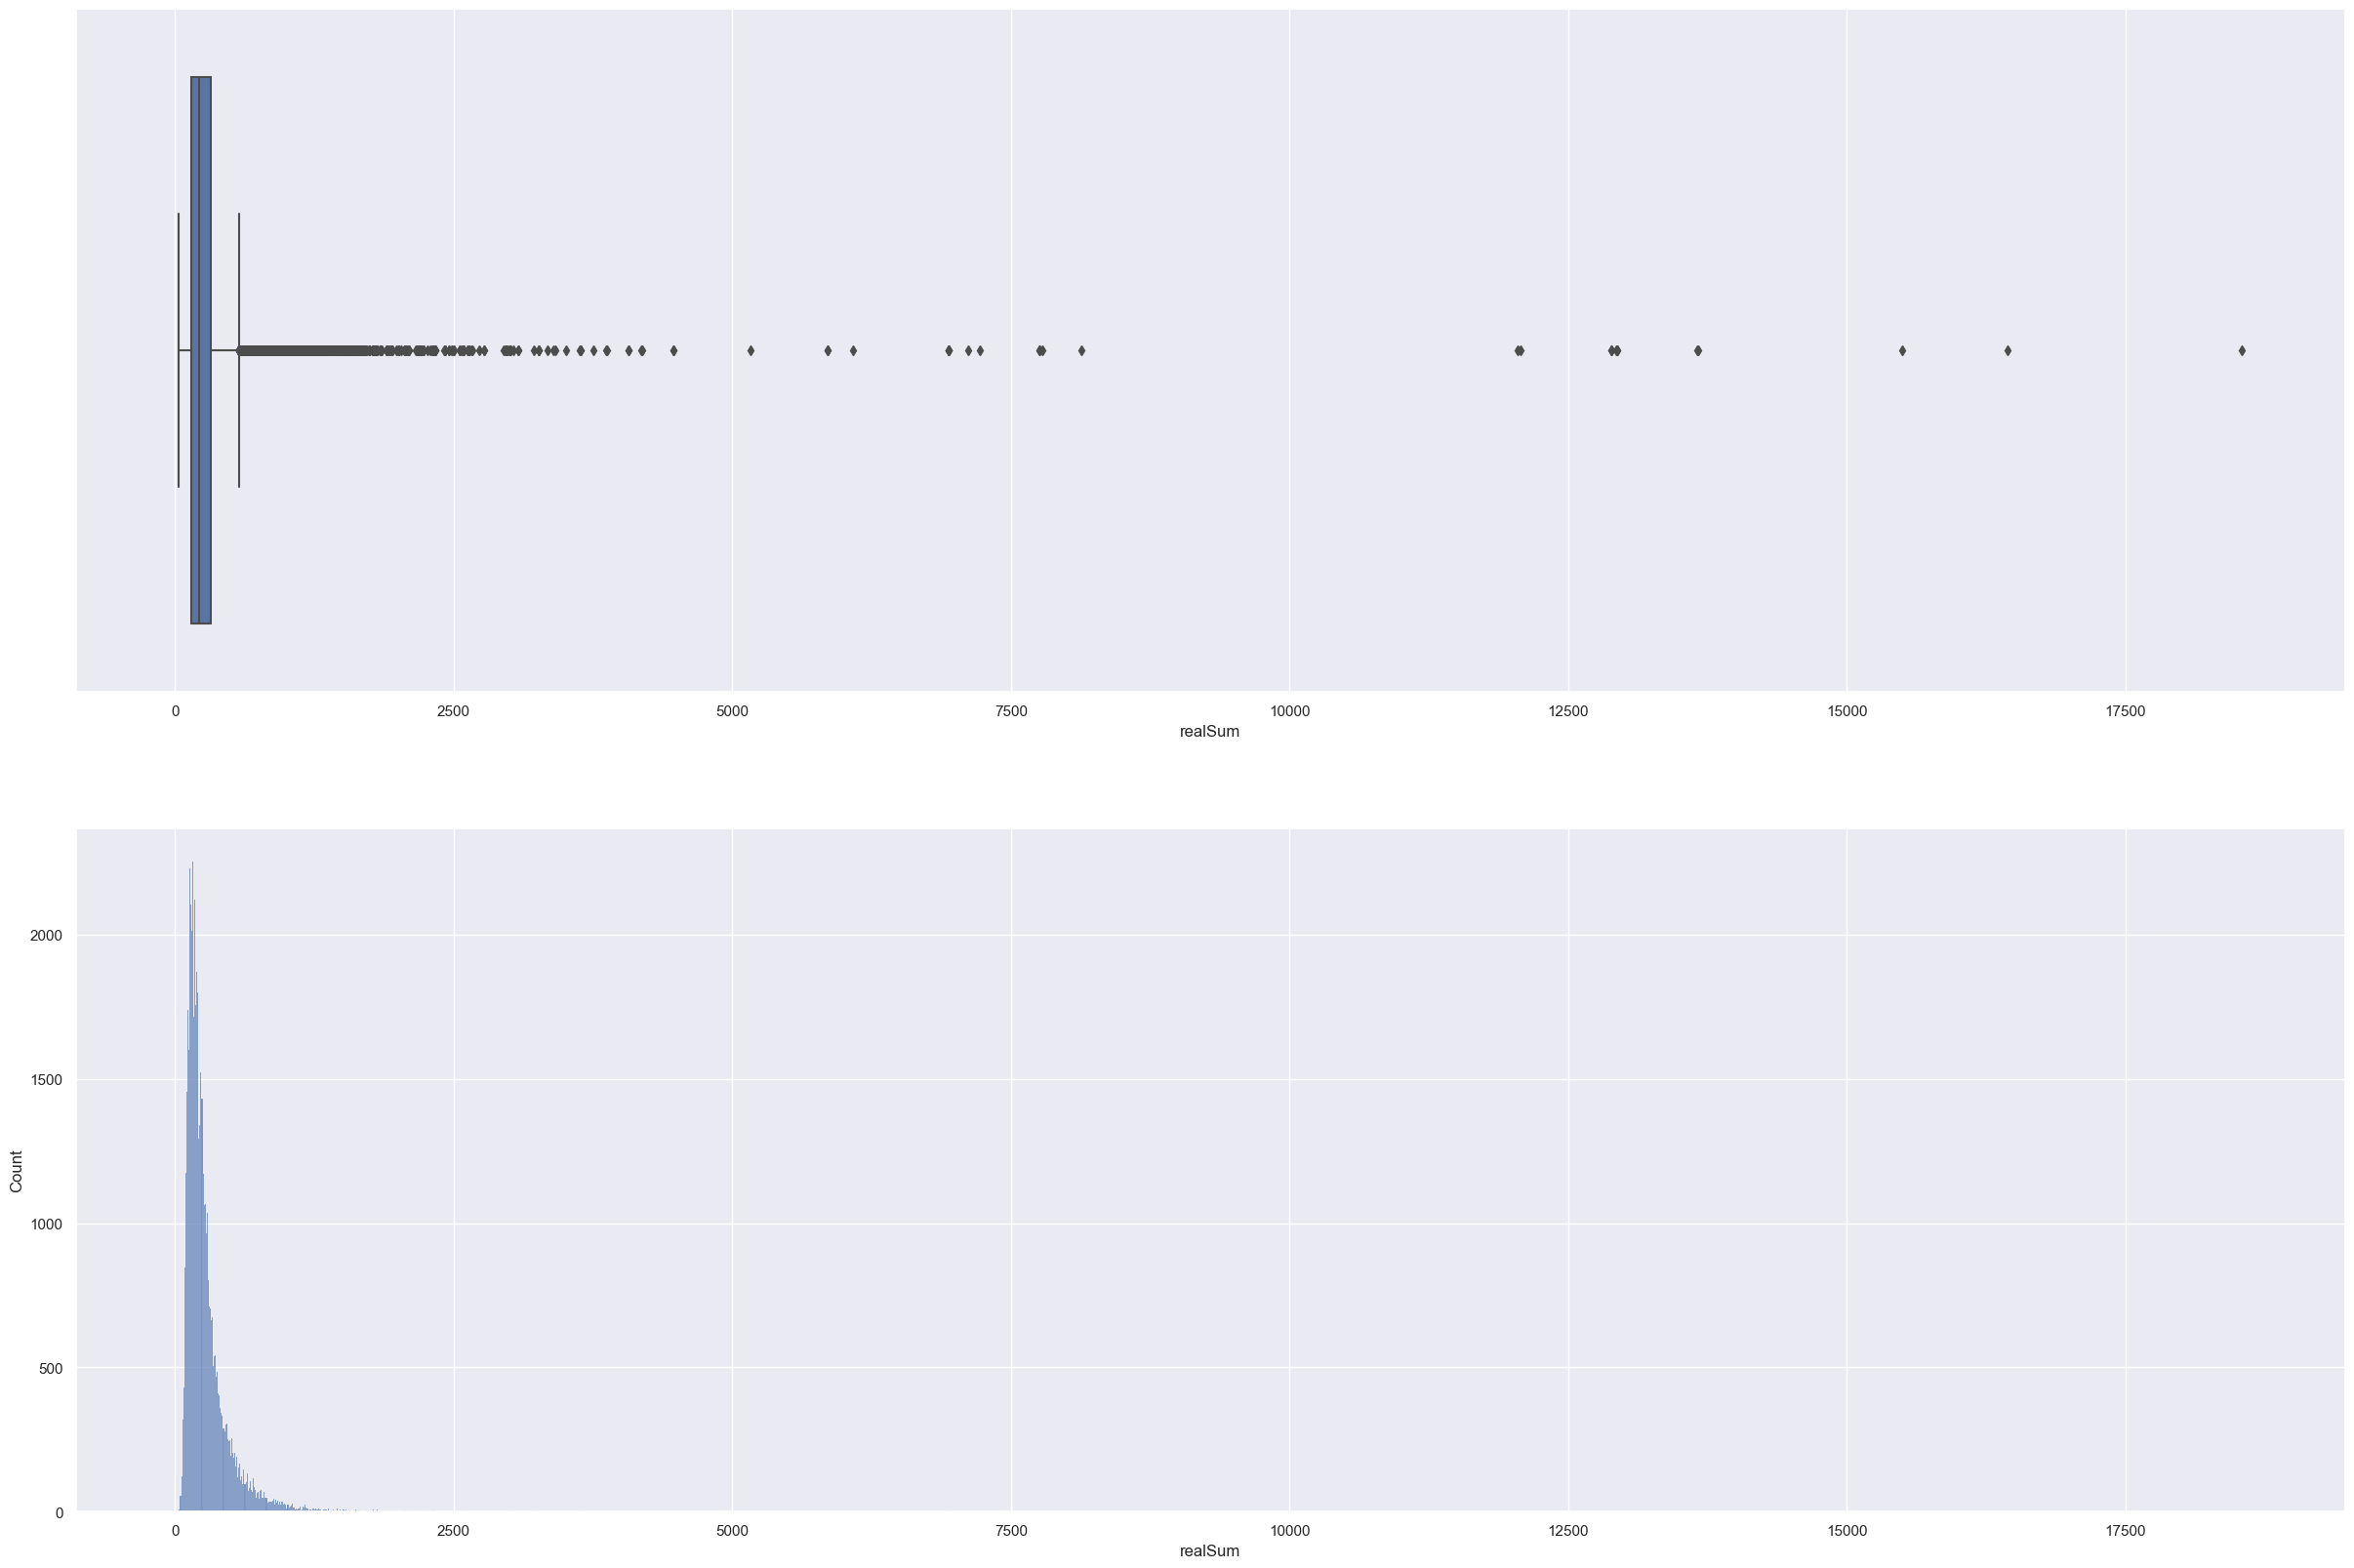

In [14]:
f, axes = plt.subplots(2, 1, figsize=(30, 20))
sb.boxplot(x=data['realSum'],orient = 'h', ax = axes[0])
sb.histplot(data=data['realSum'], ax= axes[1])

In [15]:
data['realSum'].skew()

21.419956563350983

# Reducing skewness of data
Looking at the boxplot, there appears to be many extreme values. The histplot indicates that the data is positive skewed with many and large outliers. The median being around 211 but there are many listings above even the 2500 mark. The skew being about 21.4 also indicates that data is highly skewed to the right. 

To reduce skewness of data, we will removing outliers with interquartile range (IQR).

## Removing outliers with IQR

Firstly, checking the values of lower and upper limit, since lower limit is below 0, we do not have any outliers below lower limit. Before removal, we checked the spread of cities and room type in the outliers to make sure we are not removing too many data of a certain attribute. The cities and room type seem proportional to the number of each attribute in our original dataset so we decided to remove these outliers.

In [16]:
def outlier(df, col):
    sorted(df[col])
    Q1,Q3 = np.percentile(df[col] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [17]:
lower , upper = outlier(data, 'realSum')
print("lower: ",lower)
print("upper: ",upper)

lower:  -107.660995498034
upper:  576.1074557199221


In [18]:
tempdf = data[data['realSum']>upper]

In [19]:
data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [20]:
tempdf['city'].value_counts()

london       1332
paris         979
amsterdam     740
barcelona     231
berlin        104
rome           87
lisbon         67
vienna         54
budapest       42
athens         26
Name: city, dtype: int64

In [21]:
data['room_type'].value_counts()

Entire home/apt    32648
Private room       18693
Shared room          366
Name: room_type, dtype: int64

In [22]:
tempdf['room_type'].value_counts()

Entire home/apt    3312
Private room        348
Shared room           2
Name: room_type, dtype: int64

In [23]:
outlierindex = data[data['realSum']>upper].index
# data_without_outliers = pd.DataFrame(data)
data.drop(index = outlierindex, inplace=True)

<AxesSubplot: xlabel='realSum', ylabel='Count'>

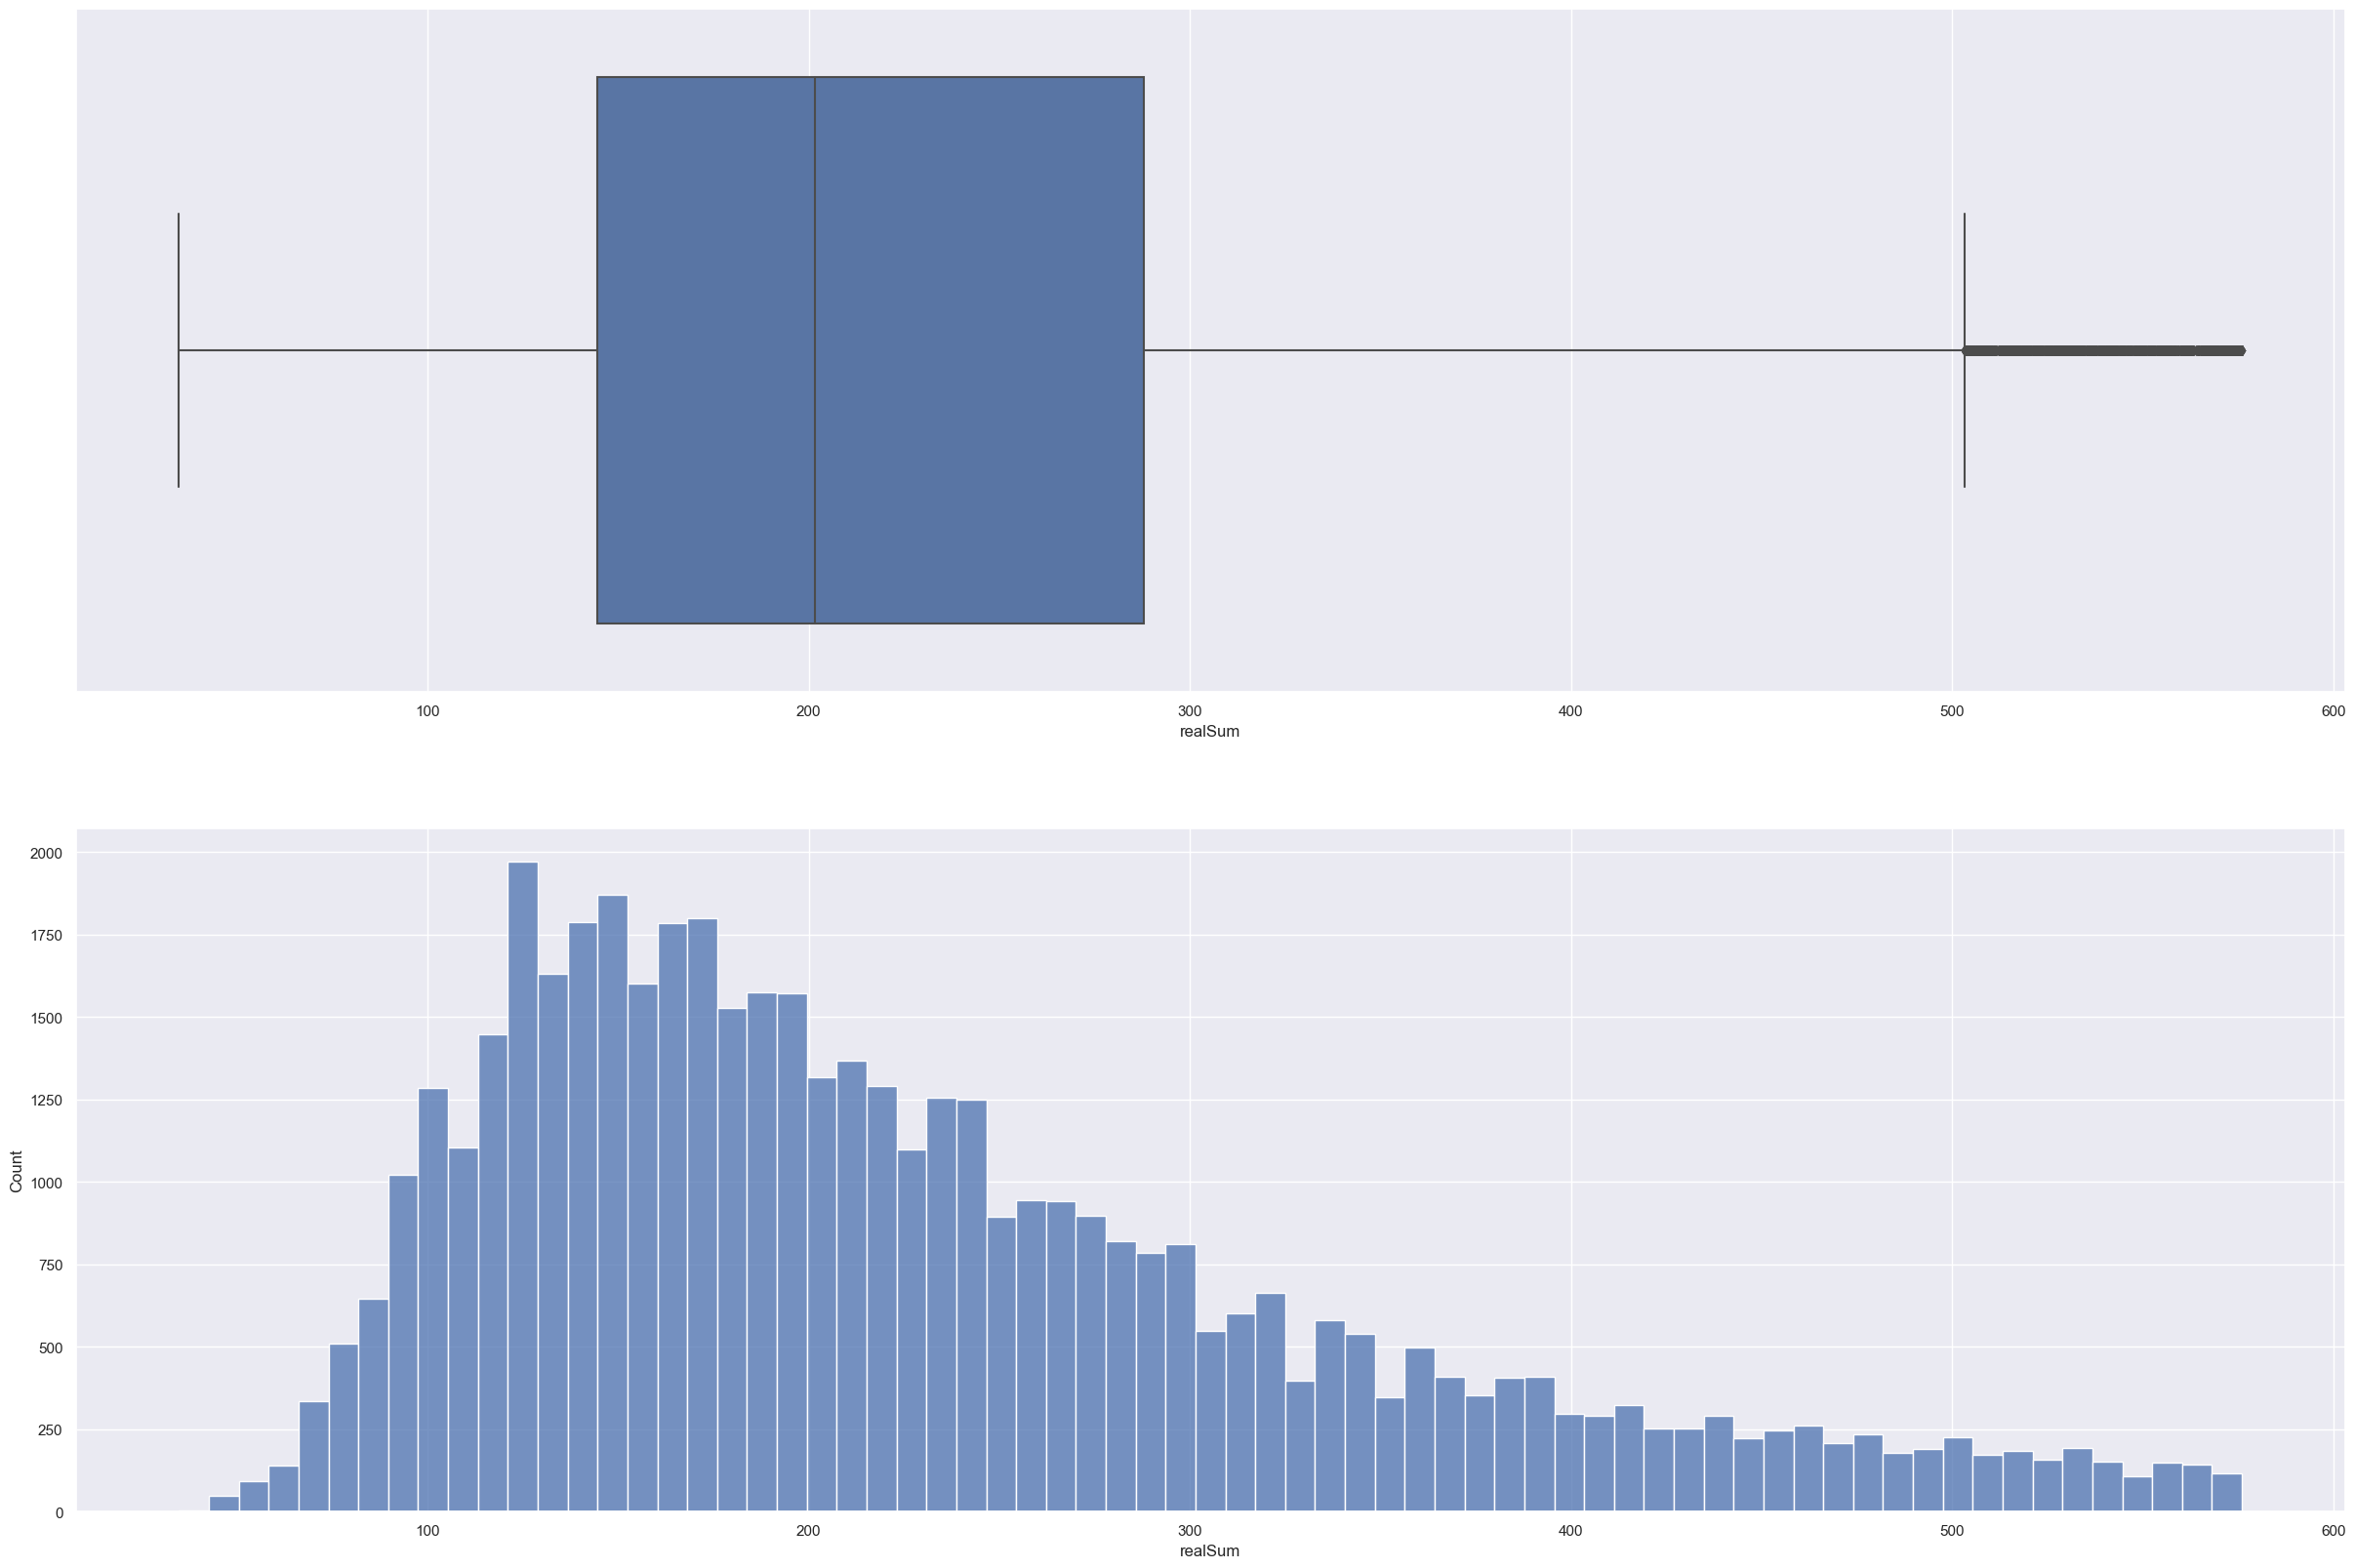

In [24]:
f, axes = plt.subplots(2, 1, figsize=(30, 20))
sb.boxplot(x=data['realSum'],orient = 'h', ax = axes[0])
sb.histplot(data=data['realSum'], ax= axes[1])

In [25]:
data['realSum'].skew()

0.990397565302506

# Exploratory Data Analysis (EDA)

Now we will analyse each variable and how it is correlated to our target variable 'realSum'. Variables with high correlation will be used for our model. 
We have split our variables into numeric and categorical for easier analysis.

**Additional note:** 'Guest_satisfaction_overall' is a numeric variable while 'cleanliness_rating' is a categorical data despite being float type.

# a) Numerical Analysis

**Description:** Firstly, we will analyse the numerical variables in the dataset, checking their correlation with our 2 sets of data. We expected guest_satisfaction_overall to be correlated with realSum as lower prices should increase guest satisfaction. We also expected metro_dist to be correlated with realSum as being closer to a metro indicates that the location of the AirBnB is more convenient and desirable.

 - a1) dist
 - a2) metro_dist
 - a3) guest_satisfaction_overall

**Overall Analysis:** Surprisingly, the correlation for all three numeric variables are very low, at less than 0.01. Negative correlation of guest_satisfaction_overall is expected as we expected lower price to lead to higher satisfaction. Negative correlation of dist and metro_dist are also expected as lower distance from these key areas provides greater convenience and thus a higher price may be charged for the added convenience.

**metro_dist Analysis:** Looking at the boxplot whiskers, the spread of metro_dist is very small with most listings being within 2km of a metro. As most listings are within walking distance from a metro, such small variations in metro_dist are unlikely to affect realSum. 

**guest_satisfaction_overall Analysis:** The most common guest satisfaction score was the maximum score of 100 with a little less than 75% of listings having a score above 90. As the guest satisfaction score seems very biased to higher scores, it is unlikely to be helpful in predicting realSum.

In [26]:
dist = pd.DataFrame(data['dist'])
metrodist = pd.DataFrame(data['metro_dist'])
guest_satisfaction = pd.DataFrame(data['guest_satisfaction_overall'])

<AxesSubplot: >

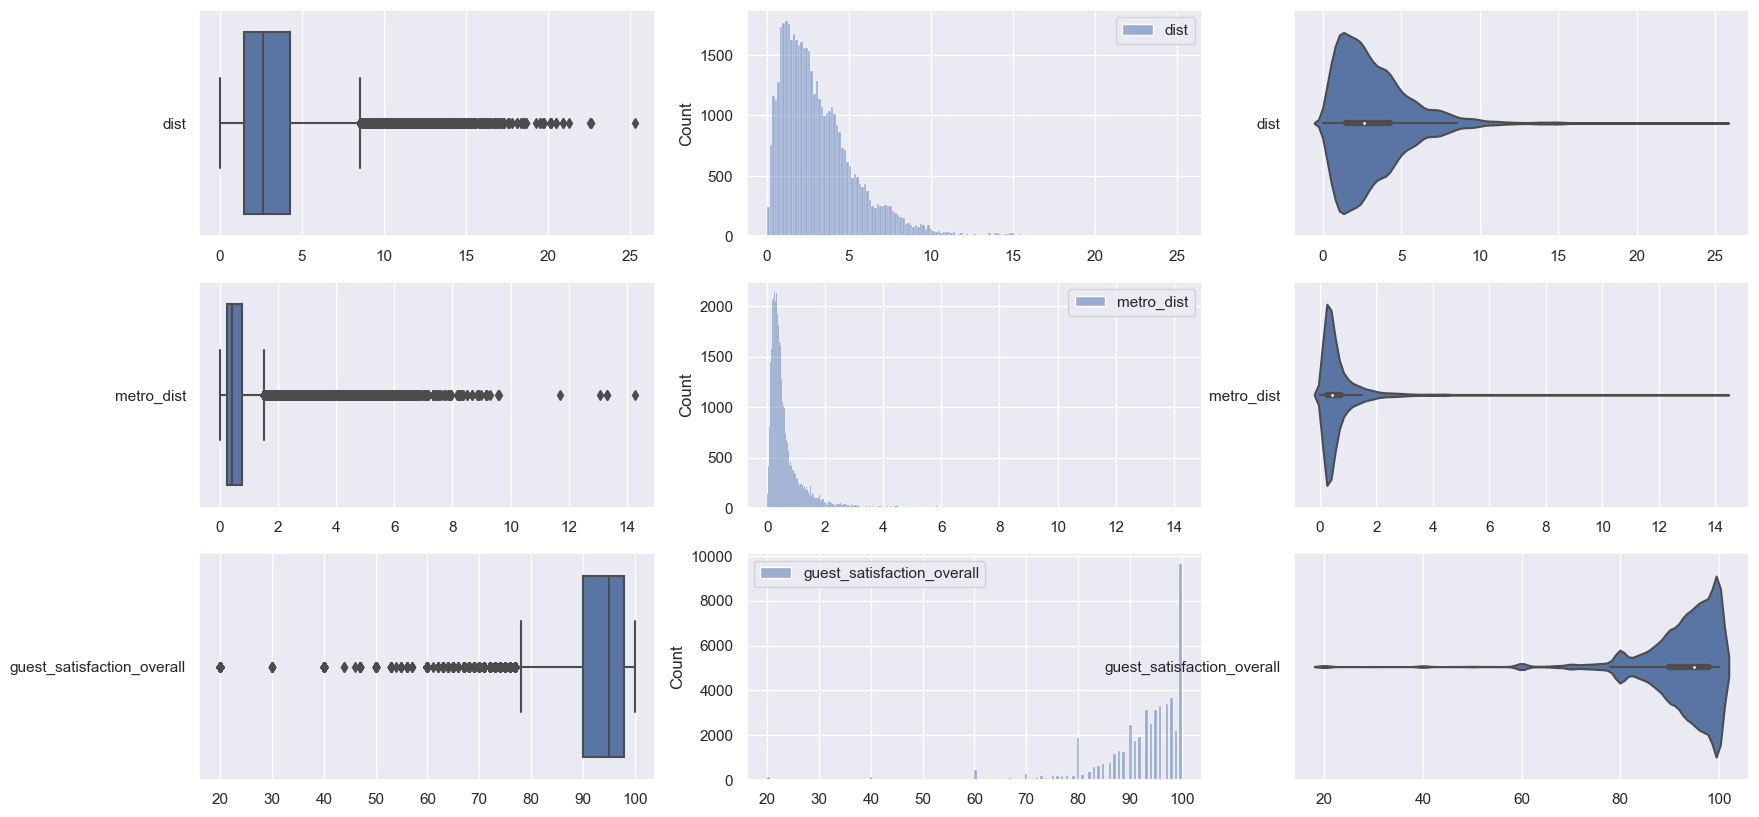

In [27]:
f, axes = plt.subplots(3, 3, figsize=(20, 10))

sb.boxplot(data = dist, orient = "h", ax = axes[0,0])
sb.histplot(data = dist, ax = axes[0,1])
sb.violinplot(data = dist, orient = "h", ax = axes[0,2])

sb.boxplot(data = metrodist, orient = "h", ax = axes[1,0])
sb.histplot(data = metrodist, ax = axes[1,1])
sb.violinplot(data = metrodist, orient = "h", ax = axes[1,2])

sb.boxplot(data = guest_satisfaction, orient = "h", ax = axes[2,0])
sb.histplot(data = guest_satisfaction, ax = axes[2,1])
sb.violinplot(data = guest_satisfaction, orient = "h", ax = axes[2,2])

In [28]:
jointdf = pd.concat([data['realSum'],dist,metrodist,guest_satisfaction],axis=1)

<AxesSubplot: >

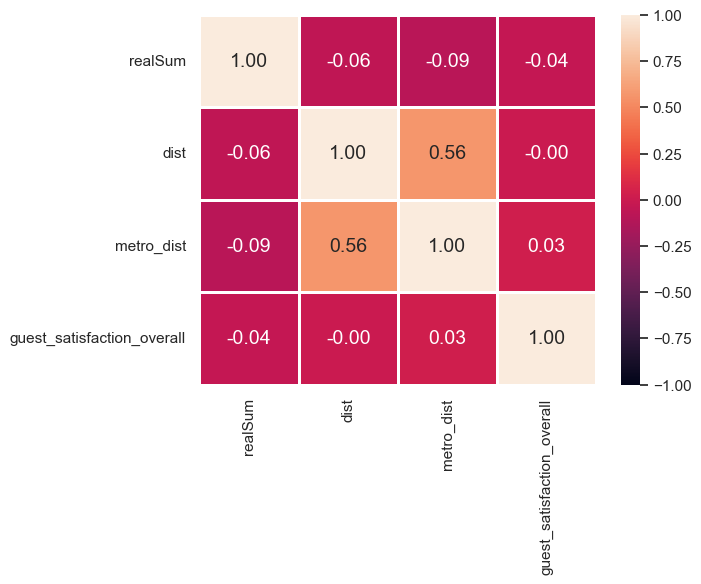

In [29]:
sb.heatmap(jointdf.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 14})

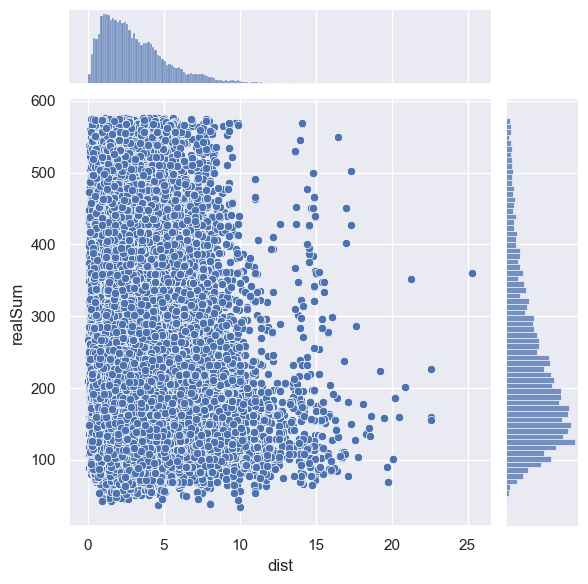

In [30]:
sb.jointplot(data=data,x='dist',y='realSum')

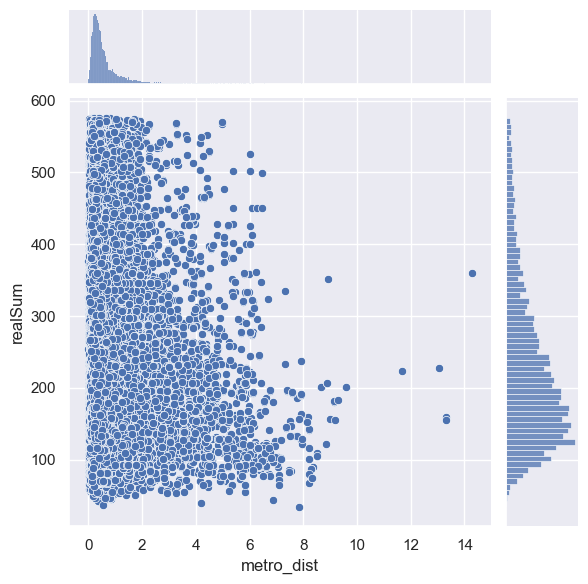

In [31]:
sb.jointplot(data=data,x='metro_dist',y='realSum')

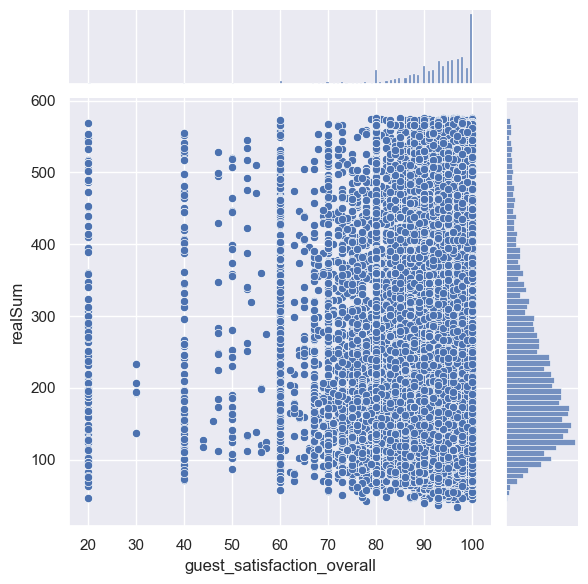

In [32]:
sb.jointplot(data=data,x='guest_satisfaction_overall',y='realSum')

# b) Categorical Analysis

**Description:** Next, we will analyse the categorical variables in the dataset.

 - b1) room_type
 - b2) person_capacity
 - b3) host_is_superhost
 - b4) multi
 - b5) biz
 - b6) cleanliness_rating
 - b7) bedrooms
 - b8) city
 - b9) weekdays

## b1) room_type

**Additional note:** We have decided to disregard the room_shared and room_private columns as those columns are represented by the room_type column.

**Analysis:** The results show that entire home/apt are the most expensive on average followed by private room, then shared room. This makes sense as we would expect purchasing more rooms to be more expensive and private room should be priced higher than shared room due to privacy being a beneficial trait. The boxplots for the 3 room_types are significantly different, thus room_type seems to be correlated to realSum.

In [33]:
print(data['room_type'].value_counts())
print(data['room_private'].value_counts())
print(data['room_shared'].value_counts())

Entire home/apt    29336
Private room       18345
Shared room          364
Name: room_type, dtype: int64
False    29700
True     18345
Name: room_private, dtype: int64
False    47681
True       364
Name: room_shared, dtype: int64


Private room:
 count    18345.000000
mean       188.040561
std         89.849367
min         34.779339
25%        126.949244
50%        164.161904
75%        224.840659
max        576.008948
Name: realSum, dtype: float64
Entire home/apt:
 count    29336.000000
mean       255.671884
std        116.582949
min         37.129295
25%        167.682927
50%        231.931300
75%        323.802399
max        576.008948
Name: realSum, dtype: float64
Shared room:
 count    364.000000
mean     141.137596
std       72.293996
min       53.343986
25%       97.807345
50%      124.296435
75%      157.520800
max      556.202815
Name: realSum, dtype: float64


<Figure size 1000x10000 with 0 Axes>

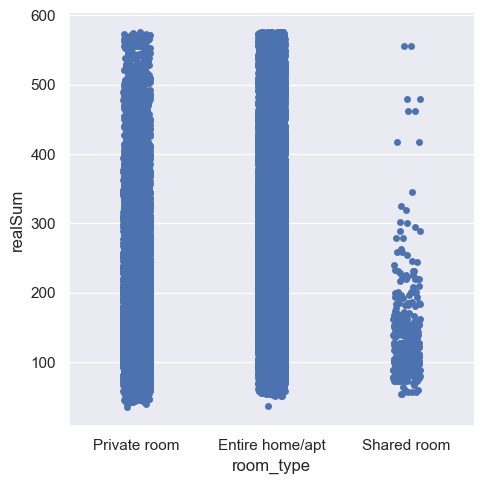

<Figure size 1000x10000 with 0 Axes>

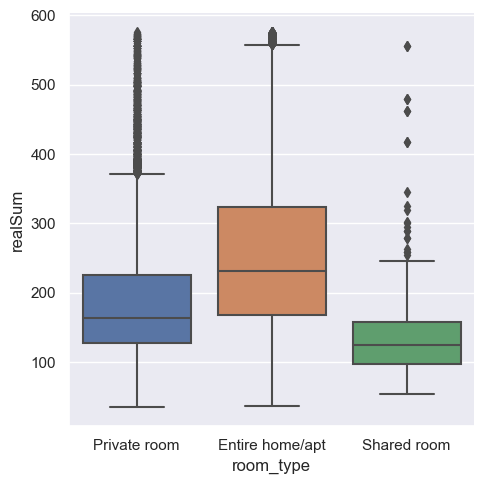

<Figure size 1000x10000 with 0 Axes>

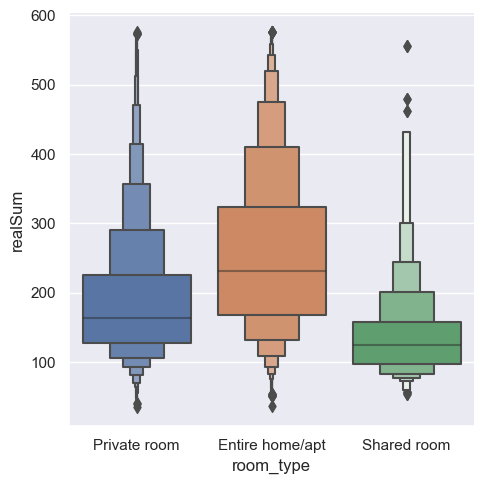

In [34]:
#room type
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="room_type", y="realSum",)
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="room_type", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data,x="room_type", y="realSum", kind="boxen",
)
print("Private room:\n",(data['realSum'].loc[data['room_type'] =='Private room']).describe())
print("Entire home/apt:\n",(data['realSum'].loc[data['room_type'] =='Entire home/apt']).describe())
print("Shared room:\n",(data['realSum'].loc[data['room_type'] =='Shared room']).describe())

## b2) person_capacity

**Analysis:** As expected, listings with a higher person_capacity are on average more expensive. As the boxplots for each category differs significantly, person_capacity seems to be correlated to 'realSum'.

In [35]:
data['person_capacity'].value_counts()

2.0    23703
4.0    12507
3.0     5957
6.0     3308
5.0     2570
Name: person_capacity, dtype: int64

2.0:
 count    23703.000000
mean       206.483239
std         99.658623
min         34.779339
25%        133.442777
50%        181.519700
75%        254.683568
max        575.507420
Name: realSum, dtype: float64
3.0:
 count    5957.000000
mean      215.308259
std       104.226167
min        39.009259
25%       138.405069
50%       190.073177
75%       266.679165
max       575.977798
Name: realSum, dtype: float64
4.0:
 count    12507.000000
mean       253.315166
std        118.070773
min         46.165022
25%        162.397769
50%        227.720450
75%        320.325993
max        576.008948
Name: realSum, dtype: float64
5.0:
 count    2570.000000
mean      262.328390
std       120.482145
min        68.193003
25%       168.021934
50%       234.349449
75%       336.097076
max       575.046904
Name: realSum, dtype: float64
6.0:
 count    3308.000000
mean      296.888854
std       126.337207
min        53.108991
25%       194.924368
50%       280.098954
75%       390.575696
max       575.9

<Figure size 1000x10000 with 0 Axes>

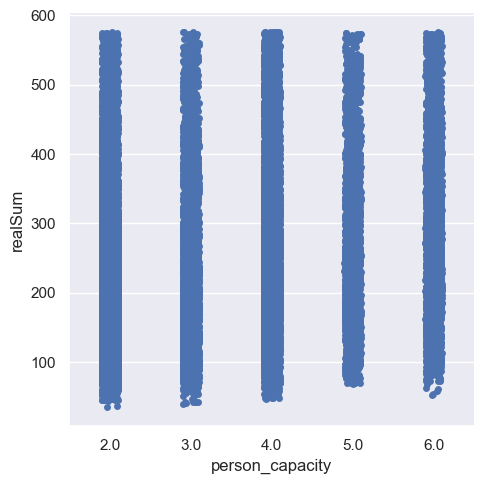

<Figure size 1000x10000 with 0 Axes>

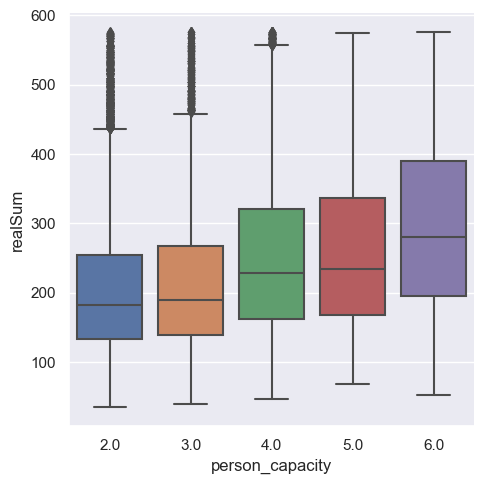

<Figure size 1000x10000 with 0 Axes>

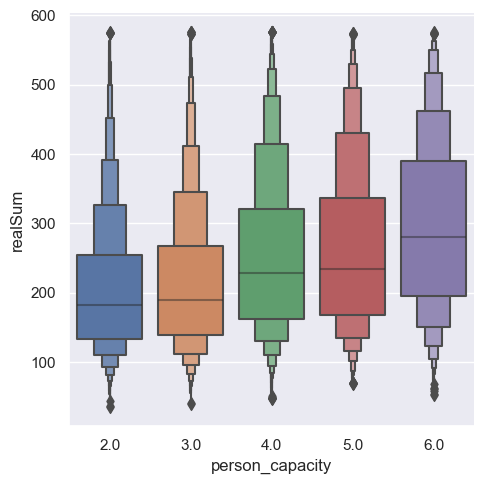

In [36]:
#person capacity
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="person_capacity", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="person_capacity", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("person_capacity"),
    x="person_capacity", y="realSum", kind="boxen",
)
print("2.0:\n",(data['realSum'].loc[data['person_capacity']==2.0]).describe())
print("3.0:\n",(data['realSum'].loc[data['person_capacity']==3.0]).describe())
print("4.0:\n",(data['realSum'].loc[data['person_capacity']==4.0]).describe())
print("5.0:\n",(data['realSum'].loc[data['person_capacity']==5.0]).describe())
print("6.0:\n",(data['realSum'].loc[data['person_capacity']==6.0]).describe())

## b3) host_is_superhost

**Description:** The superhost title assures customers that the seller has a past history of successful sales and also a high review rating. We expect this to be an important variable in affecting realSum as we consider the assurance that the listing is legitimate to be important.

**Analysis:** Contrary to our expectations, the boxplots are quite similar, indicating that there is not much difference in realSum between a superhost and a non-superhost. In fact, the median realSum of superhost is lower than that of a non-superhost. This could be due to lower price of listings attracting more buyers while also leading to buyers having a better impression and leaving better reviews. Thus, we shall not use 'host_is_superhost' as a variable for our model.

Host not superhost:
 count    35489.000000
mean       233.553744
std        114.944835
min         34.779339
25%        145.925943
50%        205.790353
75%        295.678190
max        576.008948
Name: realSum, dtype: float64
Host is superhost:
 count    12556.000000
mean       216.054457
std        102.316167
min         45.227662
25%        140.522797
50%        191.221616
75%        265.821897
max        575.977798
Name: realSum, dtype: float64


<Figure size 1000x10000 with 0 Axes>

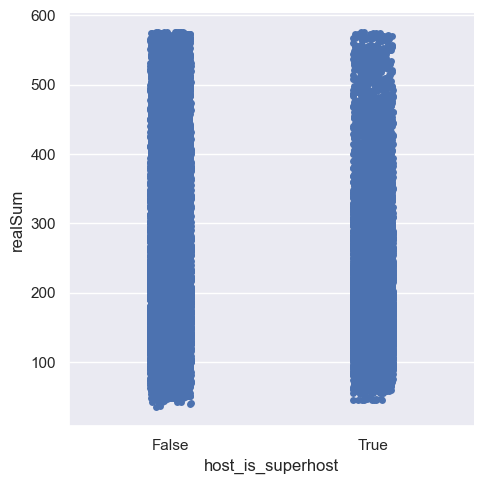

<Figure size 1000x10000 with 0 Axes>

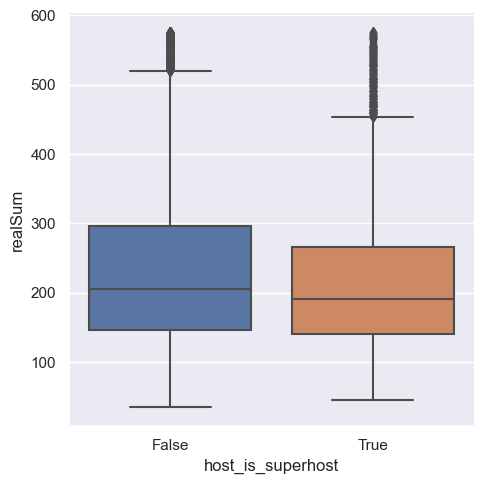

<Figure size 1000x10000 with 0 Axes>

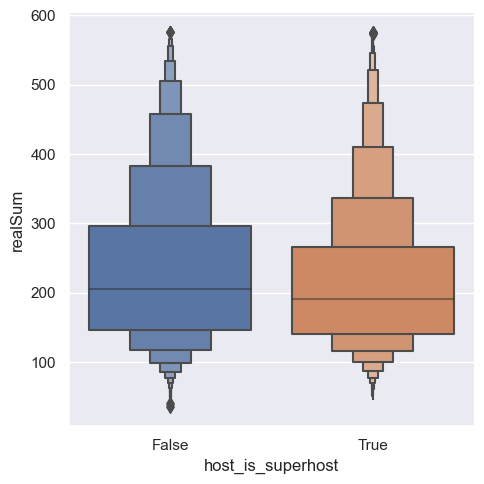

In [37]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="host_is_superhost", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="host_is_superhost", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("host_is_superhost"),
    x="host_is_superhost", y="realSum", kind="boxen",
)
print("Host not superhost:\n",(data['realSum'].loc[data['host_is_superhost']==False]).describe())
print("Host is superhost:\n",(data['realSum'].loc[data['host_is_superhost']==True]).describe())

## b4) multi

**Description:** Multi is whether the listing is for multiple rooms. It is not well-defined in our data source, thus we do not have an accurate description for multi.

**Analysis:** We will choose to omit it from our data set and there is also not much difference between the 2 medians so it will not be a big deciding factor.

Listing not for multiple rooms:
 count    33767.000000
mean       234.784290
std        113.783097
min         37.129295
25%        147.990555
50%        207.501057
75%        296.573297
max        576.008948
Name: realSum, dtype: float64
Listing for multiple rooms:
 count    14278.000000
mean       215.254758
std        106.577816
min         34.779339
25%        138.171276
50%        186.975235
75%        265.057974
max        576.008948
Name: realSum, dtype: float64


<Figure size 1000x10000 with 0 Axes>

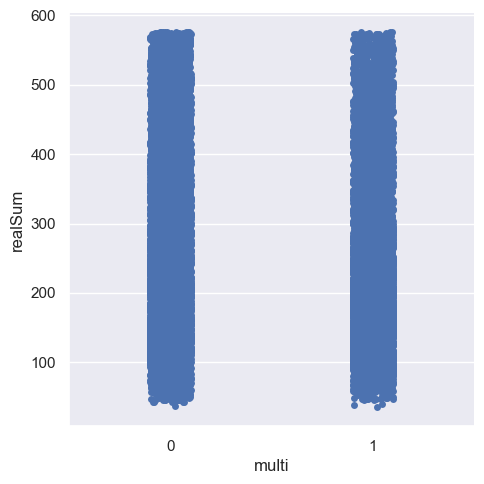

<Figure size 1000x10000 with 0 Axes>

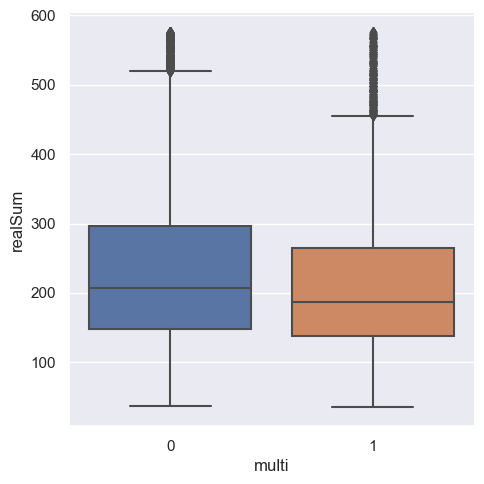

<Figure size 1000x10000 with 0 Axes>

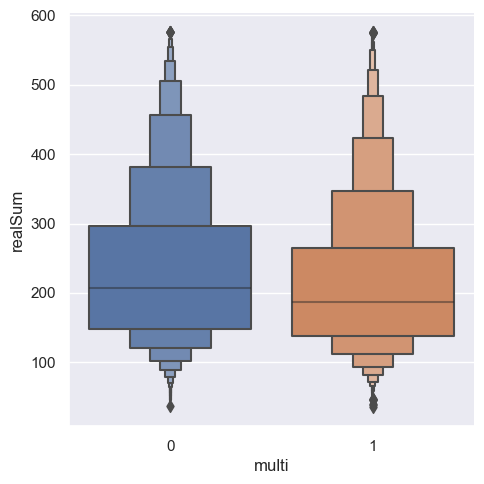

In [38]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="multi", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="multi", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("multi"),
    x="multi", y="realSum", kind="boxen",
)

print("Listing not for multiple rooms:\n",(data['realSum'].loc[data['multi']==0]).describe())
print("Listing for multiple rooms:\n",(data['realSum'].loc[data['multi']==1]).describe())

## b5) biz

**Description:** Biz indicates if the listing is being used for business purposes or not.

**Analysis:** The boxplots for biz against realSum do not seem to differ by much, indicating that biz is not correlated with realSum. This suggests that AirBnB may typically not be used for business purposes so listing an AirBnB for business does not increase demand. Since it does not give us much information, thus we shall not use 'biz' as a variable of our model. 

Listing is not for business:
 count    31489.000000
mean       223.051092
std        109.347956
min         34.779339
25%        141.394784
50%        195.917986
75%        277.984901
max        576.008948
Name: realSum, dtype: float64
Listing for business:
 count    16556.000000
mean       240.258078
std        116.175340
min         42.884259
25%        149.860894
50%        213.180113
75%        304.789209
max        575.977798
Name: realSum, dtype: float64


<Figure size 1000x10000 with 0 Axes>

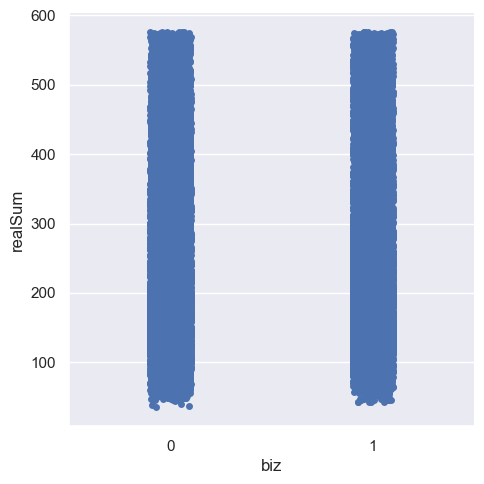

<Figure size 1000x10000 with 0 Axes>

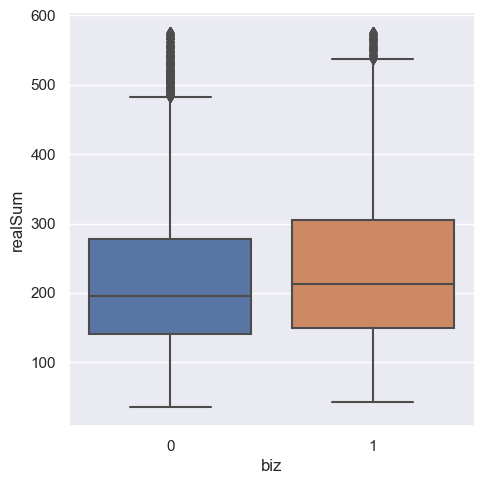

<Figure size 1000x10000 with 0 Axes>

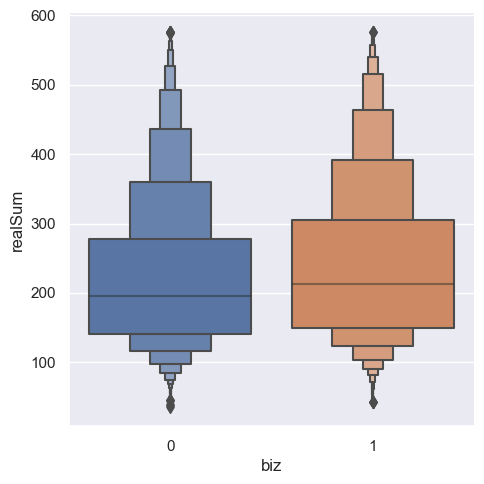

In [39]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="biz", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="biz", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("biz"),
    x="biz", y="realSum", kind="boxen",
)
print("Listing is not for business:\n",(data['realSum'].loc[data['biz']== 0]).describe())
print("Listing for business:\n",(data['realSum'].loc[data['biz']==1]).describe())

## b6) cleanliness_rating

**Description:** We expect cleanliness rating to be an important variable in determining realSum as cleaning and maintenance of the AirBnB costs money and thus lead to higher prices.

**Analysis:** From the plots, we can see that there does not seem to be an obvious trend in realSum based on cleanliness rating. Surprisingly, cleanliness rating of 3 had the higher median realSum followed by cleanliness rating of 4. This is due to the low number count. We decided to merge the ratings below 6 into a category (<6) due to the lower number count which might lead to overfitting.

In [40]:
data['cleanliness_rating'].value_counts()

10.0    27918
9.0     14424
8.0      4017
7.0       877
6.0       458
4.0       131
2.0       125
5.0        85
3.0        10
Name: cleanliness_rating, dtype: int64

In [41]:
data.loc[data['cleanliness_rating']<6,'cleanliness_rating']= -1
data = data.astype({'cleanliness_rating':str}) 
data.loc[data['cleanliness_rating']=='-1.0','cleanliness_rating']= '<6'

In [42]:
data['cleanliness_rating'].value_counts()

10.0    27918
9.0     14424
8.0      4017
7.0       877
6.0       458
<6        351
Name: cleanliness_rating, dtype: int64

Cleanliness rating <6 :
 count    351.000000
mean     244.778567
std      131.551114
min       46.057092
25%      136.514265
50%      209.012956
75%      324.805013
max      561.128308
Name: realSum, dtype: float64
Cleanliness rating 6.0:
 count    458.000000
mean     246.400644
std      128.476558
min       54.328653
25%      150.659903
50%      210.717458
75%      332.909993
max      575.507420
Name: realSum, dtype: float64
Cleanliness rating 7.0:
 count    877.000000
mean     228.600304
std      116.232639
min       62.188764
25%      135.468849
50%      196.147605
75%      306.514302
max      556.558011
Name: realSum, dtype: float64
Cleanliness rating 8.0:
 count    4017.000000
mean      228.027537
std       118.056837
min        47.571064
25%       138.526306
50%       195.498182
75%       293.751029
max       575.977798
Name: realSum, dtype: float64
Cleanliness rating 9.0:
 count    14424.000000
mean       229.004651
std        112.687264
min         39.009259
25%        144.8222

<Figure size 1000x10000 with 0 Axes>

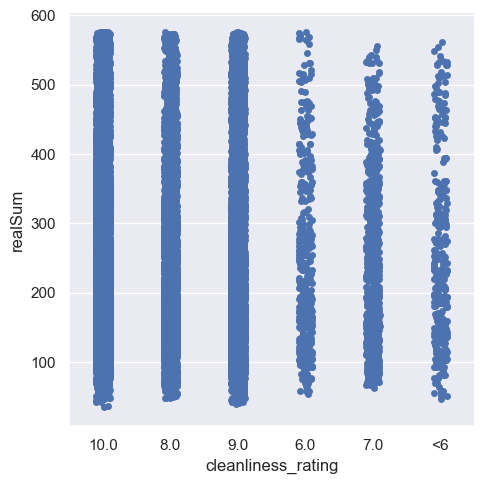

<Figure size 1000x10000 with 0 Axes>

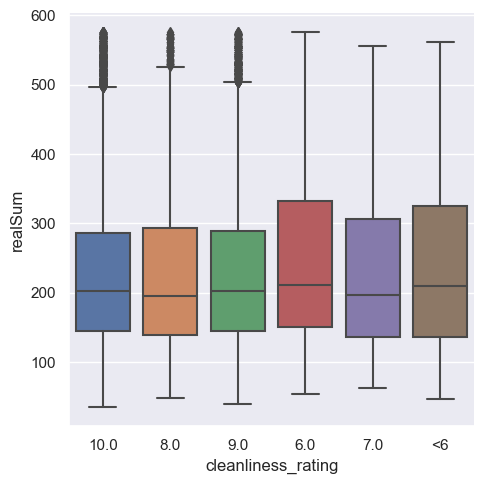

<Figure size 1000x10000 with 0 Axes>

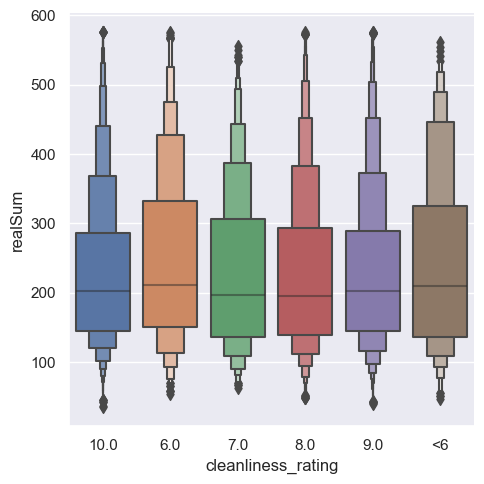

In [43]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="cleanliness_rating", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="cleanliness_rating", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("cleanliness_rating"),
    x="cleanliness_rating", y="realSum", kind="boxen",
)
print("Cleanliness rating <6 :\n",(data['realSum'].loc[data['cleanliness_rating']=='<6']).describe())
print("Cleanliness rating 6.0:\n",(data['realSum'].loc[data['cleanliness_rating']== '6.0']).describe())
print("Cleanliness rating 7.0:\n",(data['realSum'].loc[data['cleanliness_rating']== '7.0']).describe())
print("Cleanliness rating 8.0:\n",(data['realSum'].loc[data['cleanliness_rating']=='8.0']).describe())
print("Cleanliness rating 9.0:\n",(data['realSum'].loc[data['cleanliness_rating']=='9.0']).describe())
print("Cleanliness rating 10.0:\n",(data['realSum'].loc[data['cleanliness_rating']== '10.0']).describe())

In [44]:
data[data['biz']==1].describe()

,realSum,person_capacity,multi,biz,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,16556.000000,16556.000000,16556.0,16556.0,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,240.258078,3.247584,0.0,1.0,90.084682,1.083051,2.650836,0.569036,317.710926,13.608238,700.048664,24.414562,6.628694,44.368027,0.504892
std,116.175340,1.306077,0.0,0.0,10.102881,0.608348,2.026904,0.662197,236.784826,9.736855,540.951409,18.511930,11.101462,5.294130,0.499991
min,42.884259,2.000000,0.0,1.0,20.000000,0.000000,0.039814,0.002301,19.378546,1.156829,26.509371,0.640721,-9.226340,37.954000,0.000000
25%,149.860894,2.000000,0.0,1.0,86.000000,1.000000,1.174085,0.239683,143.347064,6.213007,295.230610,10.041909,-0.169160,38.721655,0.000000
50%,213.180113,3.000000,0.0,1.0,92.000000,1.000000,2.170106,0.388945,260.359013,11.677232,589.732786,18.949056,2.373395,41.906000,1.000000
75%,304.789209,4.000000,0.0,1.0,97.000000,1.000000,3.644935,0.629599,423.931346,18.193714,928.838796,35.202354,16.344628,48.871403,1.000000
max,575.977798,6.000000,0.0,1.0,100.000000,9.000000,18.511822,9.286229,4513.563486,100.000000,6696.156772,100.000000,23.777020,52.563330,1.000000


In [45]:
data[data['bedrooms']==0].describe()

,realSum,person_capacity,multi,biz,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.0,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,238.469445,2.546918,0.230451,0.427553,90.711822,0.0,2.827726,0.498883,301.008029,15.250205,635.045640,28.396029,7.799904,46.824842,0.492180
std,102.459957,0.843032,0.421170,0.494780,10.485367,0.0,2.130612,0.653958,203.741106,9.358943,449.839609,20.292950,9.734821,4.728302,0.499996
min,44.179161,2.000000,0.000000,0.000000,20.000000,0.0,0.062962,0.003220,19.378546,1.191735,26.509371,0.640721,-9.225990,37.958060,0.000000
25%,159.474623,2.000000,0.000000,0.000000,88.000000,0.0,1.211514,0.198819,157.449288,8.503819,282.325944,11.770485,2.170263,41.907600,0.000000
50%,220.432466,2.000000,0.000000,0.000000,93.000000,0.0,2.413078,0.334405,263.456196,13.630810,591.718550,24.900846,2.377770,48.833255,0.000000
75%,299.953096,3.000000,0.000000,1.000000,97.000000,0.0,3.935293,0.515952,398.837389,20.589659,840.622057,42.923361,16.391000,48.887105,1.000000
max,574.610868,6.000000,1.000000,1.000000,100.000000,0.0,20.495678,8.187105,3031.840298,100.000000,4590.306687,100.000000,23.766360,52.609220,1.000000


## b7) bedrooms

**Description:** Refers to number of bedrooms in the listing, giving us an indication about the size of the house. We expect the size of the house to be an important variable in determining realSum as the larger the house, the more attractive it will be to guests, thus leading to higher prices.

**Analysis:** From the plots, we can see that there is a low number count for those between 4 - 10 bedrooms, especially since we will typically associate them with having a larger house. Thus, we have decided to merge the 4 - 10 bedooms into a category (>3) due to lower number count which leads to overfitting. There is a significant difference between the IQR range and median for the different number of bedrooms, thus we will include bedrooms in our data.

In [46]:
data['bedrooms'].value_counts()

1     35049
2      7612
0      4348
3       957
4        60
9        10
5         5
10        2
8         2
Name: bedrooms, dtype: int64

In [47]:
data.loc[data['bedrooms']>3,'bedrooms']= -1
data = data.astype({'bedrooms':str}) 
data.loc[data['bedrooms']=='-1','bedrooms']= '>3'

0 Bedrooms:
 count    4348.000000
mean      238.469445
std       102.459957
min        44.179161
25%       159.474623
50%       220.432466
75%       299.953096
max       574.610868
Name: realSum, dtype: float64
1 Bedrooms:
 count    35049.000000
mean       215.137101
std        105.766650
min         34.779339
25%        137.547420
50%        187.735254
75%        265.528352
max        576.008948
Name: realSum, dtype: float64
2 Bedrooms:
 count    7612.000000
mean      275.590277
std       123.670659
min        37.129295
25%       176.481647
50%       252.878642
75%       357.589119
max       576.008948
Name: realSum, dtype: float64
3 Bedrooms:
 count    957.000000
mean     318.602446
std      128.906103
min       39.009259
25%      220.279802
50%      307.692308
75%      416.979362
max      574.194001
Name: realSum, dtype: float64
More than 3 Bedrooms:
 count     79.000000
mean     271.739716
std      146.837334
min       77.377173
25%      136.810039
50%      244.831722
75%      403.

<Figure size 1000x10000 with 0 Axes>

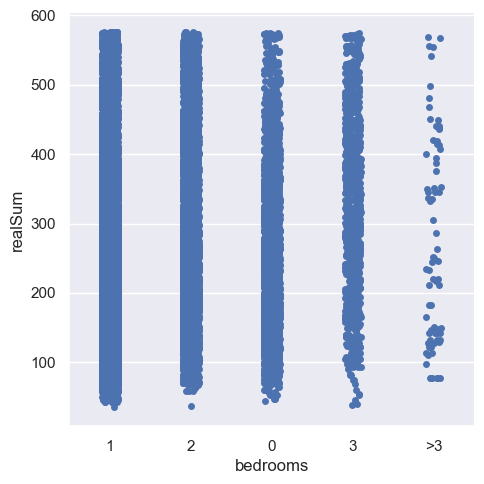

<Figure size 1000x10000 with 0 Axes>

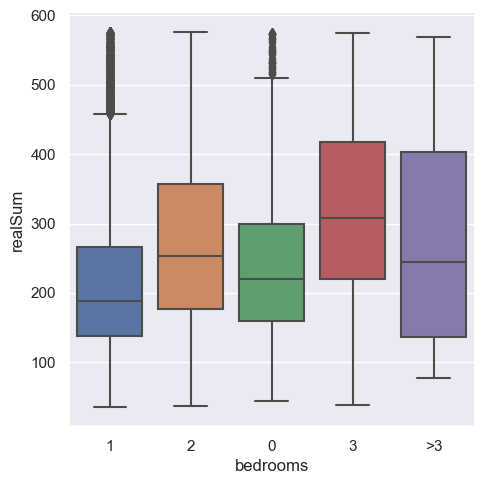

<Figure size 1000x10000 with 0 Axes>

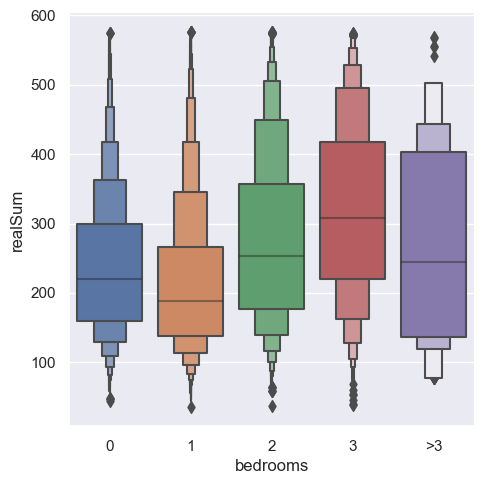

In [48]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="bedrooms", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="bedrooms", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("bedrooms"),
    x="bedrooms", y="realSum", kind="boxen",
)
print("0 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== '0']).describe())
print("1 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== '1']).describe())
print("2 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== '2']).describe())
print("3 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== '3']).describe())
print("More than 3 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== '>3']).describe())

## b8) city

**Description:** We would expect the city where the listing is located to be an important factor as some cities will have more tourist attractions and are more commonly visited compared to others, thus increasing their attractiveness factor.

**Analysis:** Based on the data, this is indeed true as there is a very big difference in the realSum of various cities.

amsterdam:
 count    1340.000000
mean      369.803200
std       102.338939
min       128.887118
25%       288.707145
50%       368.617158
75%       446.476695
max       572.727486
Name: realSum, dtype: float64
athens:
 count    5254.000000
mean      145.680222
std        71.665177
min        42.884259
25%        98.657231
50%       127.715417
75%       170.599677
max       562.416516
Name: realSum, dtype: float64
barcelona:
 count    2602.000000
mean      235.132276
std       112.327676
min        69.588289
25%       156.166360
50%       196.895292
75%       286.673494
max       574.161566
Name: realSum, dtype: float64
berlin:
 count    2380.000000
mean      214.763642
std        97.593738
min        64.971487
25%       142.797046
50%       185.566047
75%       264.793867
max       568.149949
Name: realSum, dtype: float64
budapest:
 count    3980.000000
mean      168.058828
std        70.445790
min        34.779339
25%       124.782629
50%       152.277107
75%       195.398787
max     

<Figure size 1000x10000 with 0 Axes>

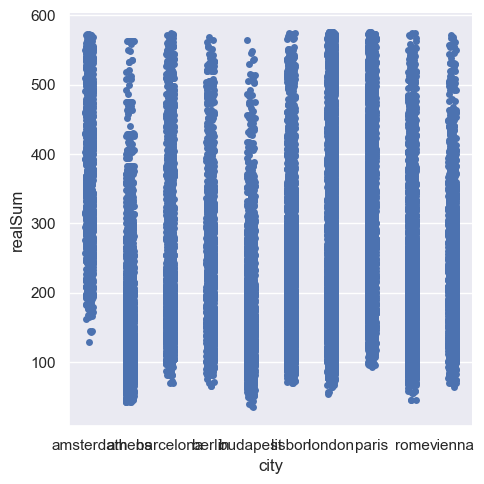

<Figure size 1000x10000 with 0 Axes>

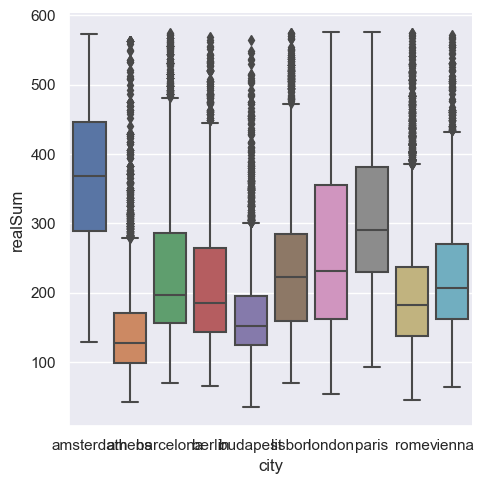

<Figure size 1000x10000 with 0 Axes>

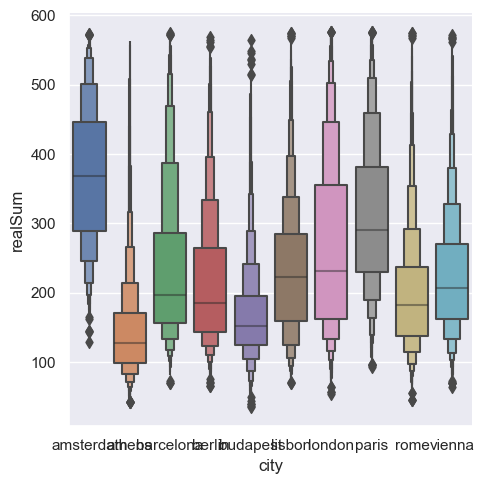

In [49]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="city", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="city", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("city"),
    x="city", y="realSum", kind="boxen",
)
print("amsterdam:\n",(data['realSum'].loc[data['city']== 'amsterdam']).describe())
print("athens:\n",(data['realSum'].loc[data['city']== 'athens']).describe())
print("barcelona:\n",(data['realSum'].loc[data['city']== 'barcelona']).describe())
print("berlin:\n",(data['realSum'].loc[data['city']=='berlin']).describe())
print("budapest:\n",(data['realSum'].loc[data['city']== 'budapest']).describe())
print("lisbon:\n",(data['realSum'].loc[data['city']=='lisbon']).describe())
print("london:\n",(data['realSum'].loc[data['city']== 'london']).describe())
print("paris:\n",(data['realSum'].loc[data['city']== 'paris']).describe())
print("rome:\n",(data['realSum'].loc[data['city']== 'rome']).describe())
print("vienna:\n",(data['realSum'].loc[data['city']== 'vienna']).describe())

<AxesSubplot: xlabel='city', ylabel='mean_realSum'>

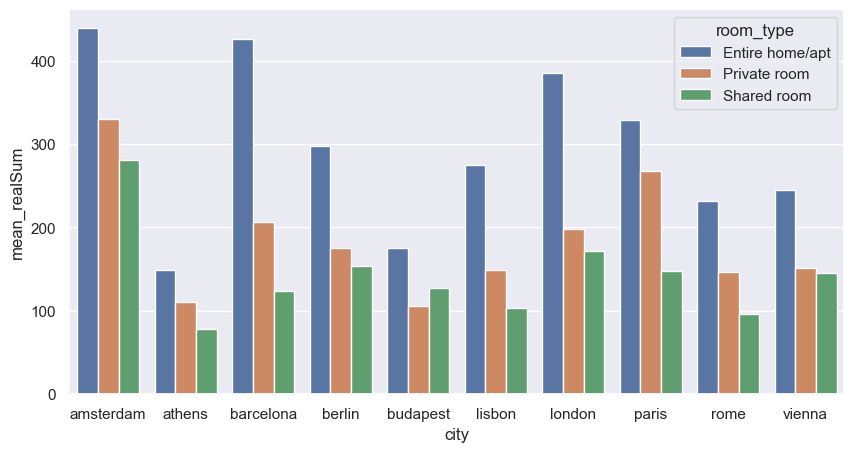

In [50]:
testdf = data.groupby(['city', 'room_type']).agg(mean_realSum=("realSum", 'mean'))
testdf = testdf.reset_index()
  
sb.set(rc={"figure.figsize":(10, 5)})
# plot barplot
sb.barplot(x="city",
           y="mean_realSum",
           hue="room_type",
           data=testdf)

## b9) weekdays

**Description:** Determines whether the listing is on a weekday or weekend. We would expect more people to stay in AirBnBs on the weekends as they are not working and can have a weekend getaway.

**Analysis:** Very surprisingly, there is no significant difference between the realSum of listings on weekday or weekend. Thus, we will not include weekdays in our data.

weekdays:
 count    23745.000000
mean       224.931383
std        110.582791
min         37.129295
25%        140.742992
50%        196.895292
75%        281.485984
max        576.008948
Name: realSum, dtype: float64
weekends:
 count    24300.000000
mean       232.937156
std        113.318872
min         34.779339
25%        148.020574
50%        205.972025
75%        293.130767
max        576.008948
Name: realSum, dtype: float64


<Figure size 1000x10000 with 0 Axes>

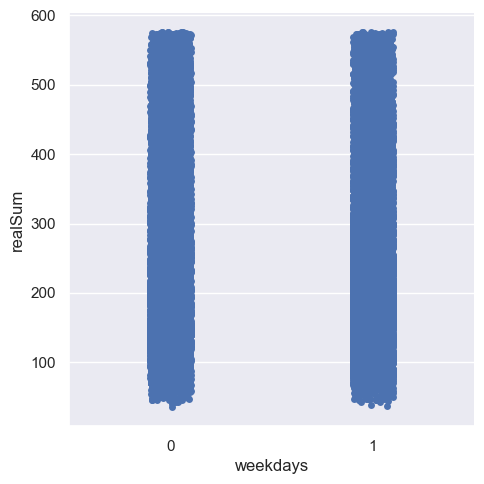

<Figure size 1000x10000 with 0 Axes>

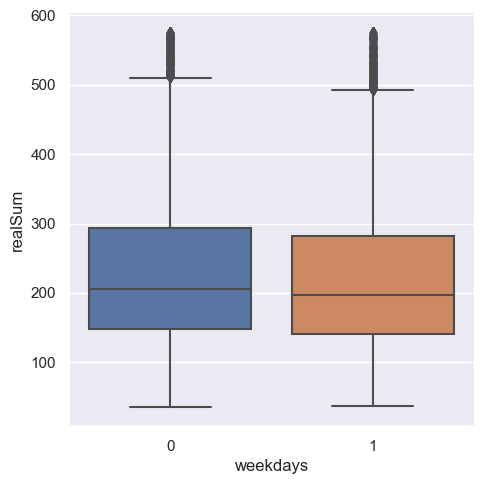

<Figure size 1000x10000 with 0 Axes>

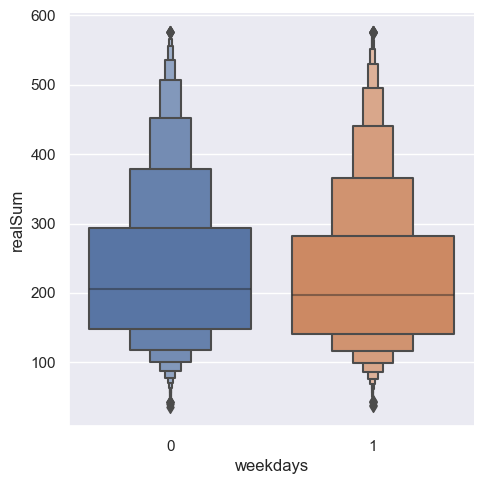

In [51]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="weekdays", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="weekdays", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("weekdays"),
    x="weekdays", y="realSum", kind="boxen",
)
print("weekdays:\n",(data['realSum'].loc[data['weekdays']== 1]).describe())
print("weekends:\n",(data['realSum'].loc[data['weekdays']== 0]).describe())

# Feature Engineering

Before doing linear regression, we will encode our categorical variables using one hot encoding.

In [52]:
#train test split do oversapling smote sampling
data

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51701,463.735596,Entire home/apt,False,False,5.0,False,1,0,10.0,90.0,...,1.021871,0.285135,176.755590,12.658480,283.428102,6.775554,16.38297,48.20176,vienna,1
51702,219.012224,Entire home/apt,False,False,4.0,False,0,0,8.0,80.0,...,0.298179,0.257904,851.189543,60.958556,593.167136,14.180090,16.37766,48.20875,vienna,1
51703,191.197438,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,...,1.052982,0.332054,195.654600,14.011946,305.781569,7.309930,16.37892,48.19973,vienna,1
51704,251.501765,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810224,0.100844,204.967222,14.678876,342.177253,8.179995,16.38070,48.20296,vienna,1


In [53]:
data = pd.get_dummies(data, columns = ['room_type','person_capacity','host_is_superhost','multi','biz','cleanliness_rating','bedrooms','weekdays','city'])

In [54]:
print(data.columns.tolist())

['realSum', 'room_shared', 'room_private', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'person_capacity_2.0', 'person_capacity_3.0', 'person_capacity_4.0', 'person_capacity_5.0', 'person_capacity_6.0', 'host_is_superhost_False', 'host_is_superhost_True', 'multi_0', 'multi_1', 'biz_0', 'biz_1', 'cleanliness_rating_10.0', 'cleanliness_rating_6.0', 'cleanliness_rating_7.0', 'cleanliness_rating_8.0', 'cleanliness_rating_9.0', 'cleanliness_rating_<6', 'bedrooms_0', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_>3', 'weekdays_0', 'weekdays_1', 'city_amsterdam', 'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna']


# Machine learning

Though our data skew is still acceptable, skewness < 1. It is on the higher end of the acceptable range. Thus, we feel that applying some kind of transformation to reduce right skew could lead to a better model. We will try 3 different types of transformation, log transform, square root transform and boxcox transformation. 

In [55]:
data['realSum'].skew()

0.990397565302506

In [56]:
#Obtaining train test data
from sklearn.model_selection import train_test_split
y = pd.DataFrame(data['realSum']) #Response variable
X = pd.DataFrame(data,columns=['guest_satisfaction_overall', 'dist', 'metro_dist',
                       'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 
                      'person_capacity_2.0', 'person_capacity_3.0', 'person_capacity_4.0', 'person_capacity_5.0',
                      'person_capacity_6.0', 
                      'host_is_superhost_False', 'host_is_superhost_True',
                      'multi_0', 'multi_1', 'biz_0', 'biz_1', 
                      'cleanliness_rating_10.0', 'cleanliness_rating_6.0', 'cleanliness_rating_7.0', 'cleanliness_rating_8.0',
                      'cleanliness_rating_9.0', 'cleanliness_rating_<6',
                      'bedrooms_0', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_>3',
                      'weekdays_0', 'weekdays_1',
                      'city_amsterdam', 'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 
                      'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna'])

In [57]:
y.head()

,realSum
0,194.033698
1,344.245776
2,264.101422
3,433.529398
4,485.552926


## Log transform

By simply applying log10 to our realSum, values on left of median are stretched while values on right of median are squeezed, leading to our data becoming more normal and less skewed.

In [58]:
log_y = pd.DataFrame(np.log10(y['realSum']))
print(log_y.head())

    realSum
0  2.287877
1  2.536869
2  2.421771
3  2.637019
4  2.686237


## Square root transform

Applying square root to our realSum values penalises larger values more than smaller values, leading to distance between larger values becoming narrower, hence reducing skewness.

In [59]:
sqrt_y = pd.DataFrame(np.sqrt(y['realSum']))
print(sqrt_y.head())

     realSum
0  13.929598
1  18.553861
2  16.251198
3  20.821369
4  22.035266


## Boxcox transform

Boxcox transform seeks to minimise the standard deviation of the data by finding a value of lambda from -5 to 5 that best approximates the data to a normal curve. The mathematical formula used is (y^(lambda) -1 )/ lambda if lambda is not zero and log(y) if lambda is zero.

In [60]:
from scipy import stats
boxcox_y = pd.DataFrame((y.apply(lambda x: stats.boxcox(x)[0])))
print(boxcox_y.head())

    realSum
0  5.138525
1  5.682413
2  5.431365
3  5.900344
4  6.007269


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (38436, 40) (38436, 1)
Test Set  : (9609, 40) (9609, 1)


In [62]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, log_y, test_size=0.2, random_state=23)
print("Train Set :", X_train_log.shape, y_train_log.shape)
print("Test Set  :", X_test_log.shape, y_test_log.shape)

Train Set : (38436, 40) (38436, 1)
Test Set  : (9609, 40) (9609, 1)


In [63]:
y_train_log.head()

,realSum
7052,2.289448
3692,2.294126
21724,1.956770
2229,2.085014
653,2.575051


In [64]:
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X, sqrt_y, test_size=0.2, random_state=23)
print("Train Set :", X_train_sqrt.shape, y_train_sqrt.shape)
print("Test Set  :", X_test_sqrt.shape, y_test_sqrt.shape)

Train Set : (38436, 40) (38436, 1)
Test Set  : (9609, 40) (9609, 1)


In [65]:
y_train_sqrt.head()

,realSum
7052,13.954810
3692,14.030174
21724,9.514480
2229,11.028262
653,19.387669


In [66]:
X_train_boxcox, X_test_boxcox, y_train_boxcox, y_test_boxcox = train_test_split(X, boxcox_y, test_size=0.2, random_state=23)
print("Train Set :", X_train_boxcox.shape, y_train_boxcox.shape)
print("Test Set  :", X_test_boxcox.shape, y_test_boxcox.shape)

Train Set : (38436, 40) (38436, 1)
Test Set  : (9609, 40) (9609, 1)


In [67]:
y_train_boxcox.head()

,realSum
7052,5.141966
3692,5.152212
21724,4.410669
2229,4.693206
653,5.765556


# Linear regression

Now, we will use sklearn model to fit our 4 linear regression models on the train set.

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lm = LinearRegression().fit(X_train,y_train)

#Coefficient of model
print("Coefficient of model:",lm.coef_)

Coefficient of model: [[ 1.83694323e-01 -1.05680180e+01  9.64406534e-02  8.33951030e+01
  -4.17650966e+00 -7.92185934e+01 -3.36316025e+01 -1.49520075e+01
   3.88696208e+00  9.46451776e+00  3.52321302e+01  3.92058755e-01
  -3.92058755e-01 -6.79273402e+00  6.79273402e+00 -1.54493183e+01
   1.54493183e+01  1.22335060e+01  9.83551200e+00 -2.09716599e+01
  -1.55012937e+01 -6.38456213e+00  2.07884978e+01 -4.15001374e+01
  -2.37180282e+01  8.93158242e+00  3.64743932e+01  1.98121899e+01
   3.49525925e+00 -3.49525925e+00  1.71182316e+02 -1.57793422e+02
   4.00780188e+01  3.62589353e+01 -1.21350299e+02 -3.97014060e+01
   8.45840957e+01  7.70229799e+01 -5.41219989e+01 -3.61592190e+01]]


In [70]:
lm_log = LinearRegression().fit(X_train_log,y_train_log)

#Coefficient of model
print("Coefficient of log model:",lm_log.coef_)

Coefficient of log model: [[ 6.02414985e-04 -2.18115737e-02  7.13830839e-04  1.73043200e-01
   1.63537017e-04 -1.73206737e-01 -6.34290630e-02 -2.84732122e-02
   6.66158591e-03  2.21906325e-02  6.30500568e-02 -2.08381932e-03
   2.08381932e-03 -1.15167638e-02  1.15167638e-02 -2.77239652e-02
   2.77239652e-02  2.71454868e-02  1.44069491e-02 -3.98596038e-02
  -3.06667017e-02 -1.06072630e-02  3.95811326e-02 -5.96470061e-02
  -3.38107026e-02  2.21546584e-02  5.79155503e-02  1.33875000e-02
   6.33365630e-03 -6.33365630e-03  2.99651230e-01 -3.34194095e-01
   8.55495797e-02  8.33904174e-02 -2.36576475e-01 -6.08673045e-02
   1.62583636e-01  1.44745092e-01 -9.31885406e-02 -5.10935406e-02]]


In [71]:
lm_sqrt = LinearRegression().fit(X_train_sqrt,y_train_sqrt)

#Coefficient of model
print("Coefficient of sqrt model:",lm_sqrt.coef_)

Coefficient of sqrt model: [[ 0.00806373 -0.35594914  0.00917761  2.8179804  -0.07170268 -2.74627771
  -1.08094487 -0.48216092  0.11823238  0.33851708  1.10635634 -0.00985097
   0.00985097 -0.20838883  0.20838883 -0.48606638  0.48606638  0.4243719
   0.28177751 -0.6767279  -0.5123996  -0.19540275  0.67838084 -1.17906605
  -0.67318413  0.33242548  1.08728174  0.43254296  0.11092858 -0.11092858
   5.32841194 -5.37662708  1.36485059  1.28643691 -3.98021584 -1.1565971
   2.74383113  2.48503789 -1.6730607  -1.02206775]]


In [72]:
lm_boxcox = LinearRegression().fit(X_train_boxcox,y_train_boxcox)

#Coefficient of model
print("Coefficient of boxcox model:",lm_boxcox.coef_)

Coefficient of boxcox model: [[ 1.32393812e-03 -4.77797036e-02  1.56459860e-03  3.79075571e-01
   5.52582243e-04 -3.79628154e-01 -1.38838802e-01 -6.23340783e-02
   1.45721477e-02  4.86751491e-02  1.37925583e-01 -4.62709083e-03
   4.62709083e-03 -2.51764356e-02  2.51764356e-02 -6.06475544e-02
   6.06475544e-02  5.95205665e-02  3.14439870e-02 -8.72503452e-02
  -6.71447470e-02 -2.31763612e-02  8.66068999e-02 -1.30159068e-01
  -7.37639011e-02  4.86019297e-02  1.26506105e-01  2.88149341e-02
   1.38540468e-02 -1.38540468e-02  6.55305257e-01 -7.32295235e-01
   1.87502229e-01  1.82874368e-01 -5.17922634e-01 -1.32944486e-01
   3.55942803e-01  3.16747477e-01 -2.03749229e-01 -1.11460551e-01]]


# Evaluation on train and test sets

**Analysis:** Out of the three types of transformation we tried, all 3 transformations led to a better r-squared value than for the data without any transformations. Log and boxcox transformation appear to be the best transformations for our data with r-squared value of train set and test set being around 0.602 while square root only improves r-squared to around 0.586. Thus, we decided to use boxcox transformation for our final model.

In [100]:
from sklearn.metrics import r2_score,mean_squared_error

pred_train = lm.predict(X_train)  
None_r2score_train = r2_score(y_train,pred_train)
print('Evaluation metrics without transformation\n')
print('R-squared value of train set::',None_r2score_train)
print('Adjusted R-squared value of train set::',1 - (1-None_r2score_train)*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean squared error of train set::',mean_squared_error(y_train,pred_train))    
print('Root mean squared error:',mean_squared_error(y_train,pred_train,squared=False))
print('\n')
pred_test = lm.predict(X_test)  
None_r2score_test = r2_score(y_test,pred_test)
print('R-squared value of test set::',None_r2score_test)
print('Adjusted R-squared value of test set::',1 - (1-None_r2score_test)*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean squared error of test set::',mean_squared_error(y_test,pred_test))    
print('Root mean squared error:',mean_squared_error(y_test,pred_test,squared=False))


Evaluation metrics without transformation

R-squared value of train set:: 0.58247350640418
Adjusted R-squared value of train set:: 0.5822474309984261
Mean squared error of train set:: 0.08680360060782902
Root mean squared error: 0.294624507819409


R-squared value of test set:: 0.5806953771602139
Adjusted R-squared value of test set:: 0.5804683389621665
Mean squared error of test set:: 0.08751022756154055
Root mean squared error: 0.29582127638413797


In [101]:
pred_train_log = lm_log.predict(X_train_log)    
log_r2score_train = r2_score(y_train_log,pred_train_log)
print('Evaluation metrics with LOG transformation\n')
print('R-squared value of train set::',log_r2score_train)
print('Adjusted R-squared value of train set::',1 - (1-log_r2score_train)*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean squared error of train set::',mean_squared_error(y_train_log,pred_train_log))    
print('Root mean squared error:',mean_squared_error(y_train_log,pred_train_log,squared=False))
print('\n')

pred_test_log = lm_log.predict(X_test_log)  
log_r2score_test = r2_score(y_test_log,pred_test_log)
print('R-squared value of test set::',log_r2score_test)
print('Adjusted R-squared value of test set::',1 - (1-log_r2score_test)*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean squared error of test set::',mean_squared_error(y_test_log,pred_test_log))    
print('Root mean squared error:',mean_squared_error(y_test_log,pred_test_log,squared=False))

print(1 - (1-r2_score(y_train_log,pred_train_log))*(len(y)-1)/(len(y)-X.shape[1]-1))

Evaluation metrics with LOG transformation

R-squared value of train set:: 0.6022232800658114
Adjusted R-squared value of train set:: 0.6020078984439552
Mean squared error of train set:: 0.017255531296071748
Root mean squared error: 0.1313603109621462


R-squared value of test set:: 0.6018371416485302
Adjusted R-squared value of test set:: 0.6016215509467697
Mean squared error of test set:: 0.017336889047061
Root mean squared error: 0.13166962082067754
0.6020078984439552


In [102]:
pred_train_sqrt = lm_sqrt.predict(X_train_sqrt)
sqrt_r2score_train = r2_score(y_train_sqrt,pred_train_sqrt)
print('Evaluation metrics with Square Root transformation\n')
print('R-squared value of train set::',sqrt_r2score_train)
print('Adjusted R-squared value of train set::',1 - (1-sqrt_r2score_train)*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean squared error of train set::',mean_squared_error(y_train_sqrt,pred_train_sqrt))    
print('Root mean squared error:',mean_squared_error(y_train_sqrt,pred_train_sqrt,squared=False))
print('\n')

pred_test_sqrt = lm_sqrt.predict(X_test_sqrt) 
sqrt_r2score_test = r2_score(y_test_sqrt,pred_test_sqrt)
print('R-squared value of test set::',sqrt_r2score_test)
print('Adjusted R-squared value of test set::',1 - (1-sqrt_r2score_test)*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean squared error of test set::',mean_squared_error(y_test_sqrt,pred_test_sqrt))    
print('Root mean squared error:',mean_squared_error(y_test_sqrt,pred_test_sqrt,squared=False))

Evaluation metrics with Square Root transformation

R-squared value of train set:: 0.5863307703528345
Adjusted R-squared value of train set:: 0.5861067835151732
Mean squared error of train set:: 5.219595562060114
Root mean squared error: 2.2846434212060562


R-squared value of test set:: 0.5885087411972592
Adjusted R-squared value of test set:: 0.5882859336515707
Mean squared error of test set:: 5.179610209068778
Root mean squared error: 2.2758757015858264


In [103]:
pred_train_boxcox = lm_boxcox.predict(X_train_boxcox)  
boxcox_r2score_train = r2_score(y_train_boxcox,pred_train_boxcox)
print('Evaluation metrics with Box Cox transformation\n')
print('R-squared value of train set::',boxcox_r2score_train)
print('Adjusted R-squared value of train set::',1 - (1-boxcox_r2score_train)*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean squared error of train set::',mean_squared_error(y_train_boxcox,pred_train_boxcox))    
print('Root mean squared error:',mean_squared_error(y_train_boxcox,pred_train_boxcox,squared=False))
print('\n')

pred_test_boxcox = lm_boxcox.predict(X_test_boxcox)  
boxcox_r2score_test = r2_score(y_test_boxcox,pred_test_boxcox)
print('R-squared value of test set::',boxcox_r2score_test)
print('Adjusted R-squared value of test set::',1 - (1-boxcox_r2score_test)*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean squared error of test set::',mean_squared_error(y_test_boxcox,pred_test_boxcox))    
print('Root mean squared error:',mean_squared_error(y_test_boxcox,pred_test_boxcox,squared=False))

Evaluation metrics with Box Cox transformation

R-squared value of train set:: 0.6023194181767413
Adjusted R-squared value of train set:: 0.6021040886101745
Mean squared error of train set:: 0.08267764303237693
Root mean squared error: 0.2875372028666498


R-squared value of test set:: 0.6018853939965776
Adjusted R-squared value of test set:: 0.601669829421708
Mean squared error of test set:: 0.08308780268383631
Root mean squared error: 0.28824954932113306


<AxesSubplot: xlabel='Transform_type', ylabel='R2_train'>

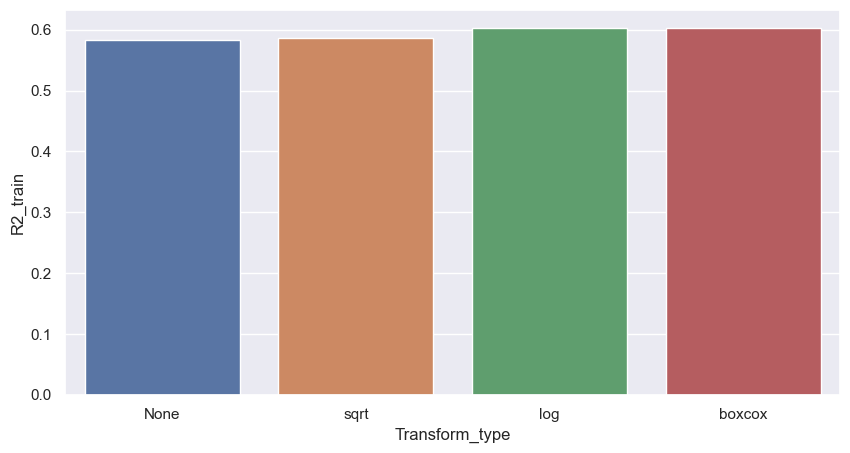

In [97]:
comparison = {'Transform_type': ['None','log','sqrt','boxcox'],
              'R2_train': [None_r2score_train,log_r2score_train,sqrt_r2score_train,boxcox_r2score_train],
              'R2_test': [None_r2score_test,log_r2score_test,sqrt_r2score_test,boxcox_r2score_test]}
comparison_df = pd.DataFrame(data=comparison)

sb.barplot(data=comparison_df,x='Transform_type',y='R2_train',order=['None','sqrt','log','boxcox'])

<AxesSubplot: xlabel='Transform_type', ylabel='R2_test'>

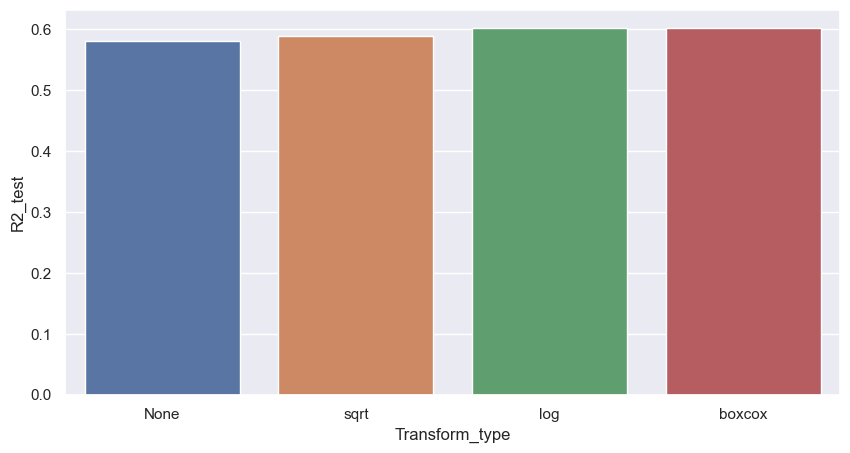

In [98]:
sb.barplot(data=comparison_df,x='Transform_type',y='R2_test',order=['None','sqrt','log','boxcox'])

# Final model

Based on earlier exploratory data analysis, we will only keep relevant variables and remove the following variables for our final model:
1) weekdays
2) cleanliness
3) superhost
4) multi
5) biz

**Analysis:** Removal of variables will always lead to reduction in r squared so we wanted to use adjusted r squared to evaluate the models. However, the difference in adjusted r squared was insignificant due to the sample size being much larger than number of predictor variables.
Even though r squared decreases, using less variables allows our model to generalise better.

In [99]:
y = pd.DataFrame(data['realSum']) #Response variable
X = pd.DataFrame(data,columns=['guest_satisfaction_overall', 'dist', 'metro_dist',
                       'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 
                      'person_capacity_2.0', 'person_capacity_3.0', 'person_capacity_4.0', 'person_capacity_5.0',
                      'person_capacity_6.0',
                      'bedrooms_0', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_>3',
                      'city_amsterdam', 'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 
                      'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna'])

final_y = pd.DataFrame((y.apply(lambda x: stats.boxcox(x)[0])))
print(final_y.head())
print('\n')
X_train, X_test, y_train, y_test = train_test_split(X, final_y, test_size=0.2, random_state=23)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
print('\n')
lm = LinearRegression().fit(X_train,y_train)

#Coefficient of model
print("Coefficient of model:",lm.coef_)
print('\n')
pred_train = lm.predict(X_train)    
print('Evaluation metrics \n')
print('R-squared value of train set::',r2_score(y_train,pred_train))
print('Adjusted R-squared value of train set::',1 - (1-r2_score(y_train,pred_train))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean squared error of train set::',mean_squared_error(y_train,pred_train))    
print('Root mean squared error:',mean_squared_error(y_train,pred_train,squared=False))
print('\n')
pred_test = lm.predict(X_test)  
print('R-squared value of test set::',r2_score(y_test,pred_test))
print('Adjusted R-squared value of test set::',1 - (1-r2_score(y_test,pred_test))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean squared error of test set::',mean_squared_error(y_test,pred_test))    
print('Root mean squared error:',mean_squared_error(y_test,pred_test,squared=False))


    realSum
0  5.138525
1  5.682413
2  5.431365
3  5.900344
4  6.007269


Train Set : (38436, 26) (38436, 1)
Test Set  : (9609, 26) (9609, 1)


Coefficient of model: [[ 2.55759529e-03 -5.01292036e-02 -4.41390919e-04  3.69735124e-01
   1.70008560e-03 -3.71435209e-01 -1.48404369e-01 -6.95840419e-02
   1.36756677e-02  5.36083973e-02  1.50704346e-01 -1.12520652e-01
  -6.68157030e-02  4.33159131e-02  1.07376137e-01  2.86443051e-02
   6.32308519e-01 -7.12488200e-01  1.78897316e-01  1.67017180e-01
  -5.14572790e-01 -1.05825614e-01  3.59910898e-01  2.91407592e-01
  -1.90299489e-01 -1.06355413e-01]]


Evaluation metrics 

R-squared value of train set:: 0.58247350640418
Adjusted R-squared value of train set:: 0.5822474309984261
Mean squared error of train set:: 0.08680360060782902
Root mean squared error: 0.294624507819409


R-squared value of test set:: 0.5806953771602139
Adjusted R-squared value of test set:: 0.5804683389621665
Mean squared error of test set:: 0.08751022756154055
Root mean squ

# Conclusion 

After our analysis, we concluded that city was the most important factor in determining AirBnB prices and by taking only the relevant factors, we ended up with a final model with R-squared value of around 0.58. Surprisingly, several of the variables including all our numeric variables were not important in predicting AirBnB prices.
We also found out that log and boxcox transformation worked best for this right skewed dataset.

# Possible improvements

1) We are unsure about how exactly the data for our data source was collected and some of the variables were not very well explained. This led to some issues during our analysis. In the future, we should be 100% sure of the data set that we are working with in order to derive valuable and accurate insights.

2) Some of our variables such as room_type and bedrooms had very skewed quantity of data with a large difference in number of data points for the category. We experimented with oversampling and undersampling but using different sampling techniques did not really apply for a numeric target variable.

3) We only did linear regression in this project even though we initially wanted to try different new techniques such as random forest regressor or decision tree. This was due to our target variable being AirBnB prices so it does not make sense to set a threshold value and convert our target variable to a categorical variable.

## References:

https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

https://towardsdatascience.com/how-and-why-performing-one-hot-encoding-in-your-data-science-project-a1500ec72d85

https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

https://www.geeksforgeeks.org/box-cox-transformation-using-python/

https://towardsdatascience.com/data-transformation-and-feature-engineering-e3c7dfbb4899

https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10